# Unsupervised Learning - Data Clustering
#### Edmar Junyor Bevilaqua

## Data Clustering Evaluation

* Use of the K-means algorithm with different parameters.
* Synthetic dataset.
* Comparisons of the different runs using an External Evaluation Index.
* Comparisons of the different runs using an Internal Evaluation Index.
* Comparisons of the different runs using a Relative Evaluation Index.

In [2]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors

from sklearn.cluster import KMeans
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs

from sklearn.metrics import adjusted_rand_score

%matplotlib inline

sns.set(style='darkgrid', context='talk', rc={'figure.figsize': (14, 8)})

# External Evaluation Index:
---

## Creating Synthetic Dataset

In [3]:
X, y = make_blobs(n_samples=1000, centers=7, n_features=2,
                  random_state=33)

df = pd.DataFrame(X, columns=['x', 'y'])
df['label'] = y

df.head()

x         y  label
0   7.415416 -5.293543      2
1  -3.898435 -0.410129      0
2  -6.065070 -0.514075      0
3  -7.980452  8.115292      3
4  10.479860 -0.900095      5

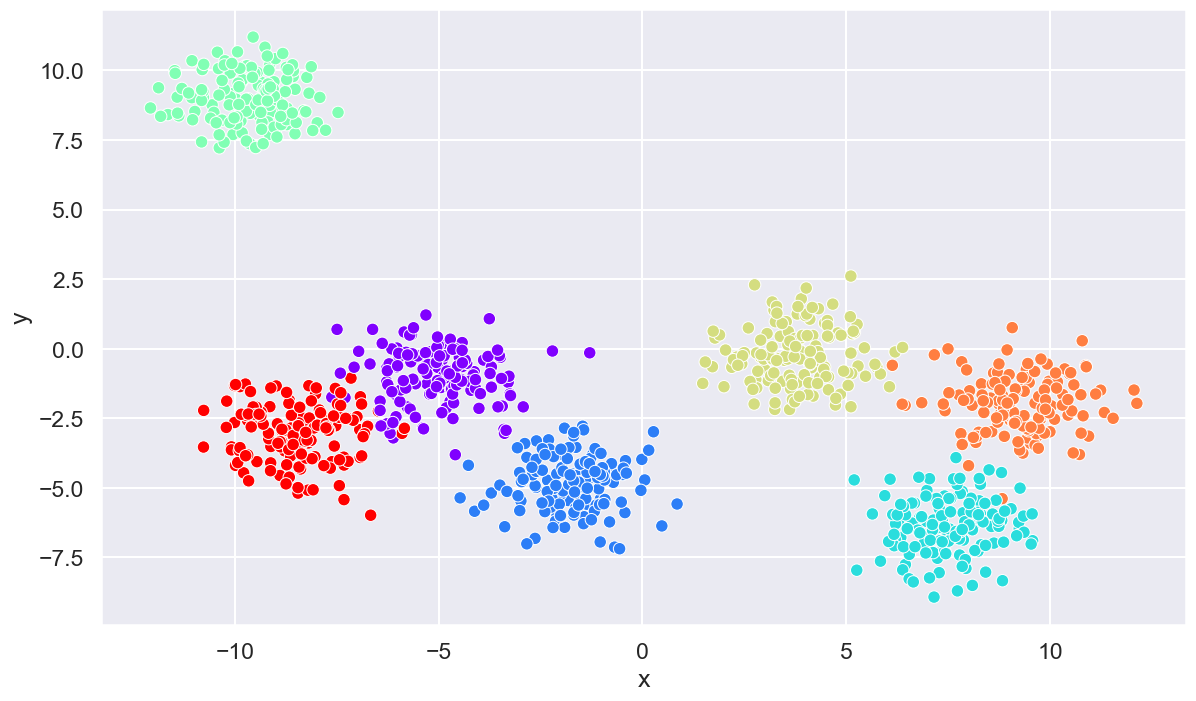

In [4]:
_ = sns.scatterplot(x='x', y='y', data=df, hue='label', palette='rainbow', legend=False)

### External Index Example:

In [5]:
import warnings

def train_and_plot(data, k=3, init='k-means++', n_init=10, max_iter=300,
                   algorithm='auto', verbose=0, random_state=133):
    warnings.filterwarnings("ignore")
    
    # Copy the data and remove the label column
    data_copy = data.copy()
    data_copy.drop(columns='label', inplace=True)
    
    model = KMeans(n_clusters=k, init=init, n_init=n_init, max_iter=max_iter,
                   algorithm=algorithm, random_state=random_state, verbose=verbose)
    model.fit(data_copy)
    
    data_copy['cluster_labels'] = model.labels_
    _ = sns.scatterplot(x='x', y='y', data=data_copy, hue='cluster_labels', palette='rainbow', legend=False)

    centroids = model.cluster_centers_
    centroids_x = centroids[:,0]
    centroids_y = centroids[:,1]

    _ = plt.scatter(centroids_x, centroids_y, color='black', s=100)
    
    warnings.filterwarnings("default")
    
    return model, model.labels_

### External Index Example:

#### Adjusted Rand Index

With the right number of clusters, the resulting groups are very similar to the ground truth.

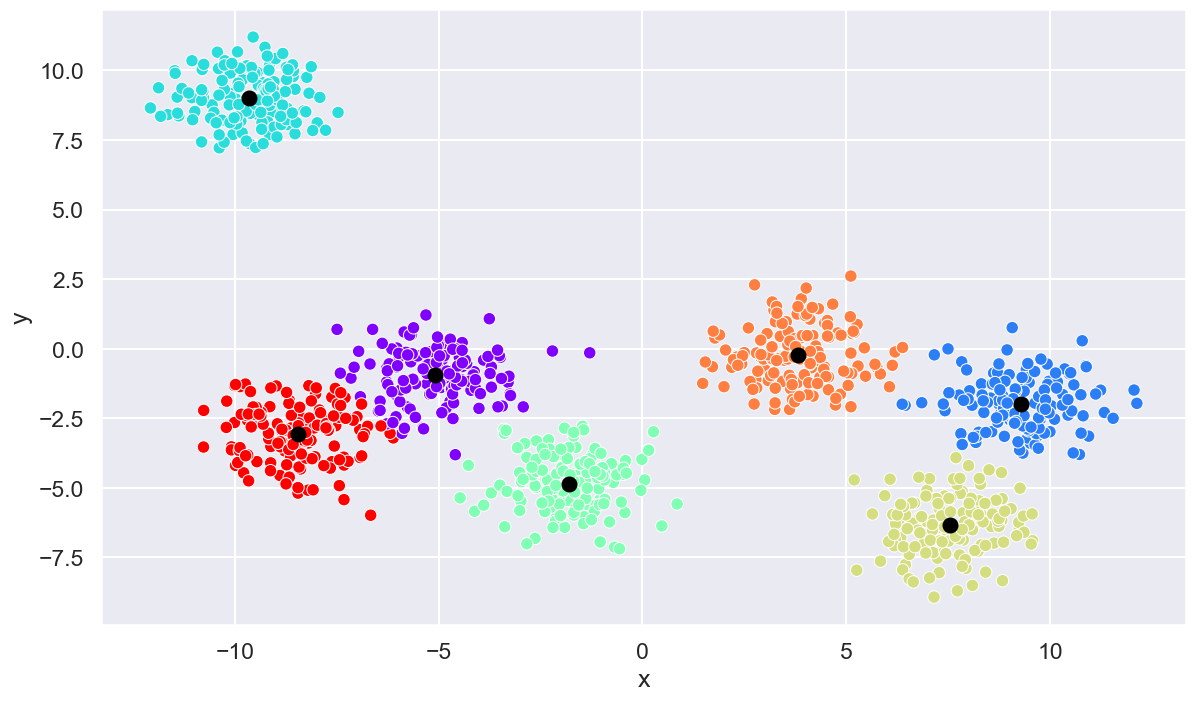

In [6]:
_, clusters_labels = train_and_plot(df, k=7)

In [7]:
print('Adjusted Rand Index', round(adjusted_rand_score(y, clusters_labels), 4))

Adjusted Rand Index 0.9637


With random initialization, the resulting clusters are less similar to the ground truth.

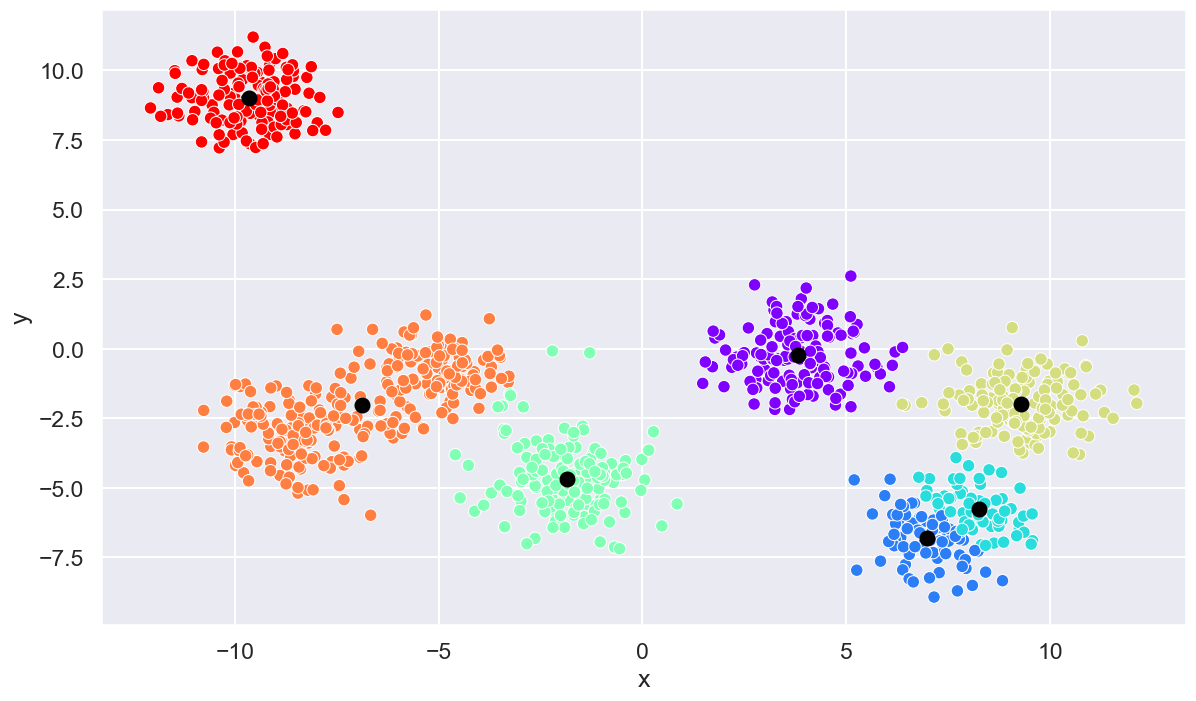

In [8]:
_, clusters_labels = train_and_plot(df, k=7, init='random', random_state=100)

In [9]:
print('Adjusted Rand Index', round(adjusted_rand_score(y, clusters_labels), 4))

Adjusted Rand Index 0.7909


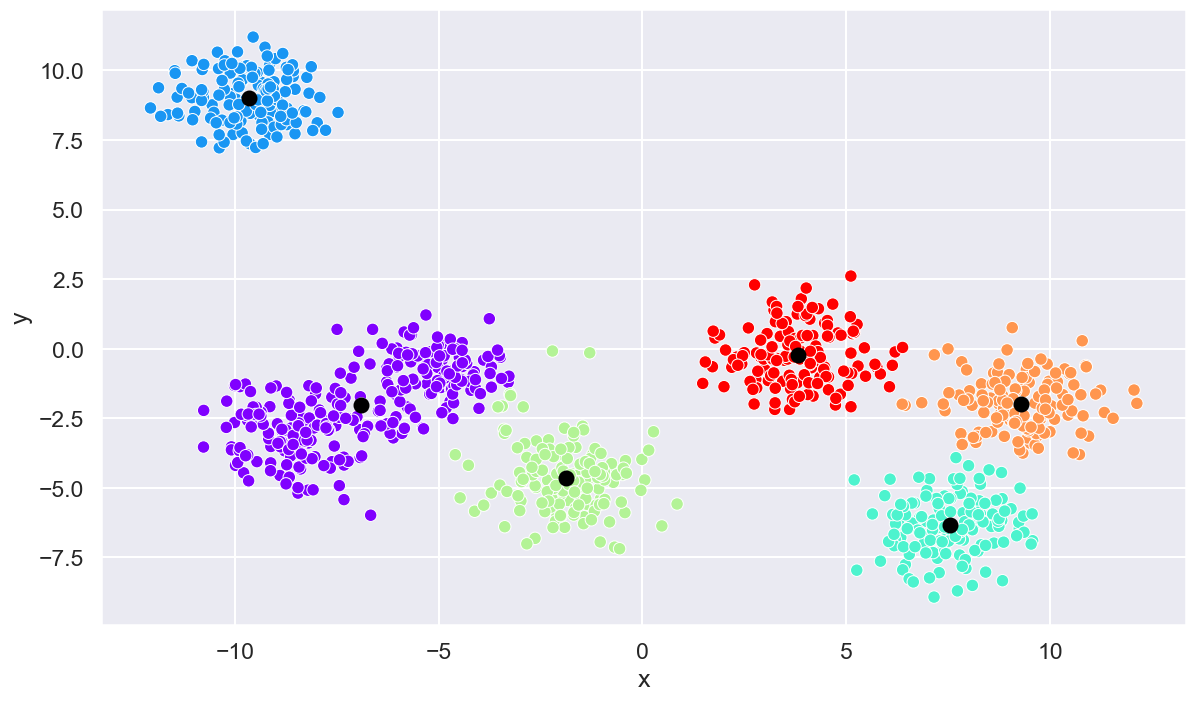

In [10]:
_, clusters_labels = train_and_plot(df, k=6, init='random', random_state=400)

In [11]:
print('Adjusted Rand Index', round(adjusted_rand_score(y, clusters_labels), 4))

Adjusted Rand Index 0.8327


With an incorrect number of clusters, where the resulting number of groups is less than the actual number of groups.

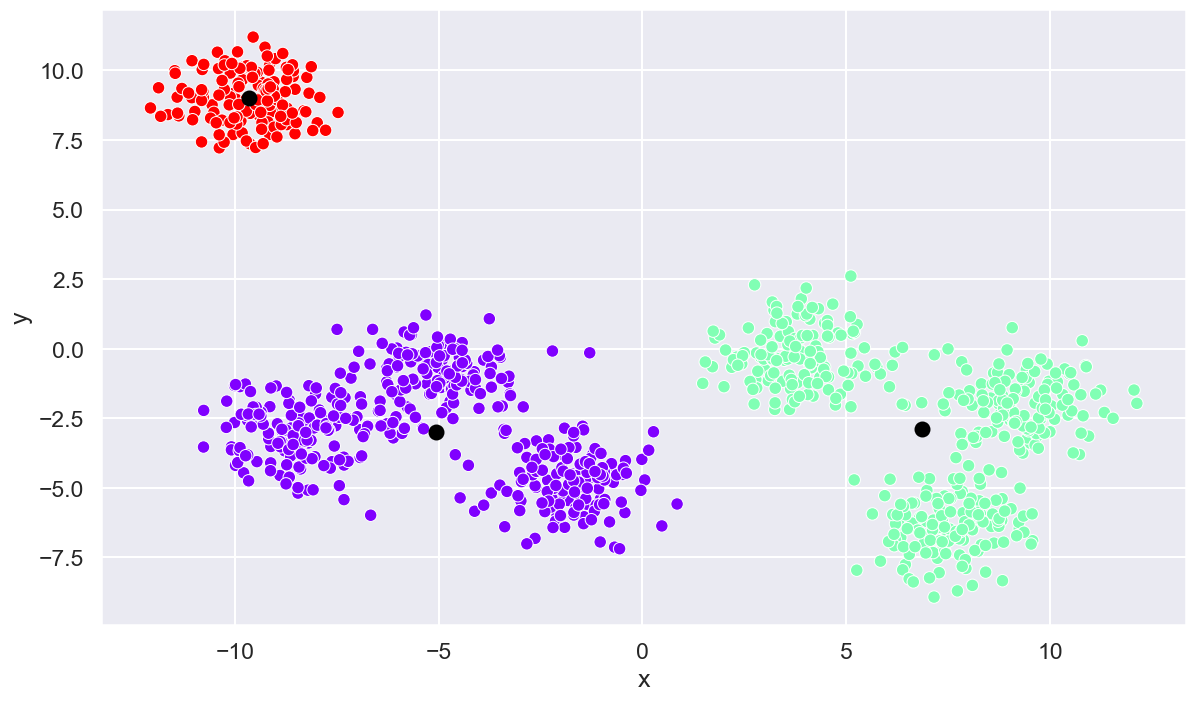

In [12]:
_, clusters_labels = train_and_plot(df, k=3)

In [13]:
print('Adjusted Rand Index', round(adjusted_rand_score(y, clusters_labels), 4))

Adjusted Rand Index 0.4153


With an incorrect number of groups (clusters), where the resulting number of groups is greater than the actual number of groups.

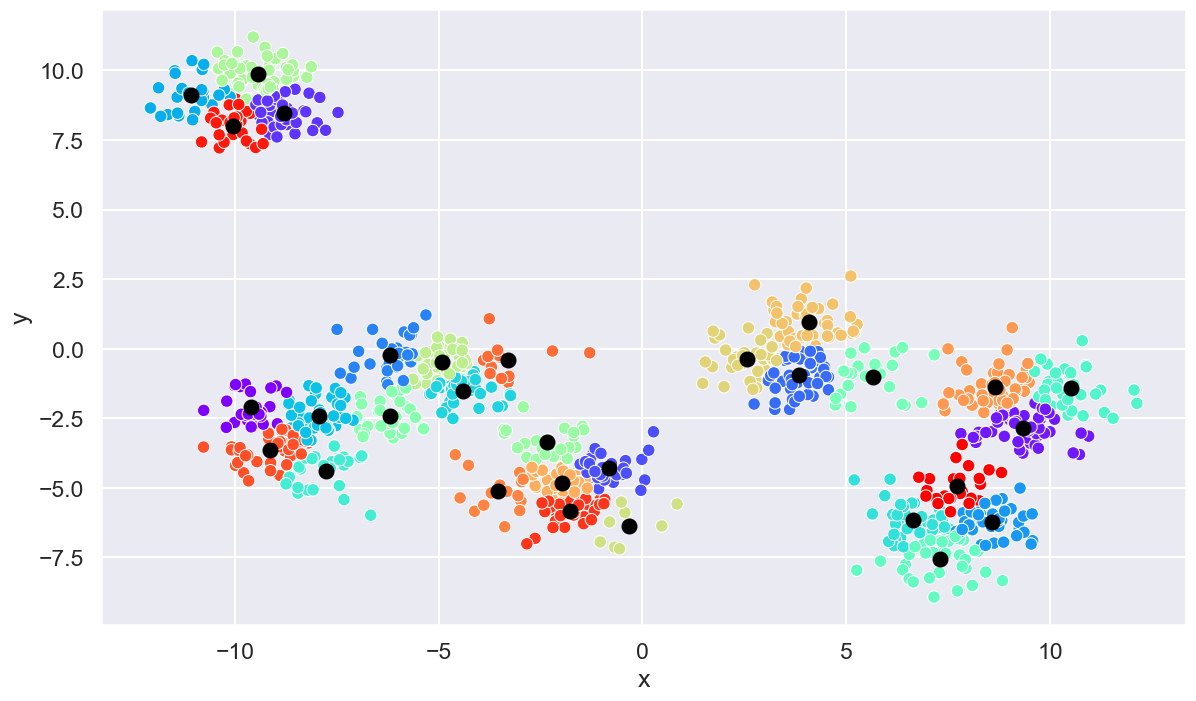

In [14]:
_, clusters_labels = train_and_plot(df, k=30)

In [15]:
print('Adjusted Rand Index', round(adjusted_rand_score(y, clusters_labels), 4))

Adjusted Rand Index 0.3532


### Plot tests with the index:
It can be very useful to see a graph of the index varying by the number of clusters

In [16]:
import warnings

def do_ajusted_random_index_and_plot(data, max_clusters):
    
    warnings.filterwarnings("ignore")
    
    min_clusters = 1

    clusters_range = range(min_clusters, max_clusters + 1)

    aris = []
    data_copy = data.copy()
    data_copy.drop(columns='label', inplace=True)

    for k in clusters_range:
        model = KMeans(n_clusters=k, random_state=33, n_init='auto')
        model.fit(data_copy)
        
        #ARI = Ajusted Random Index
        ari = adjusted_rand_score(y, model.labels_)
        aris.append(ari)
        
    _ = plt.plot(clusters_range, aris, '-o')
    _ = plt.title('Ajusted Random Index x Number of Clusters')
    _ = plt.xlabel('Number of clusters')
    _ = plt.ylabel('Ajusted Random Index')
    _ = plt.xticks(clusters_range)
    
    warnings.filterwarnings("default")
    
    plt.show()

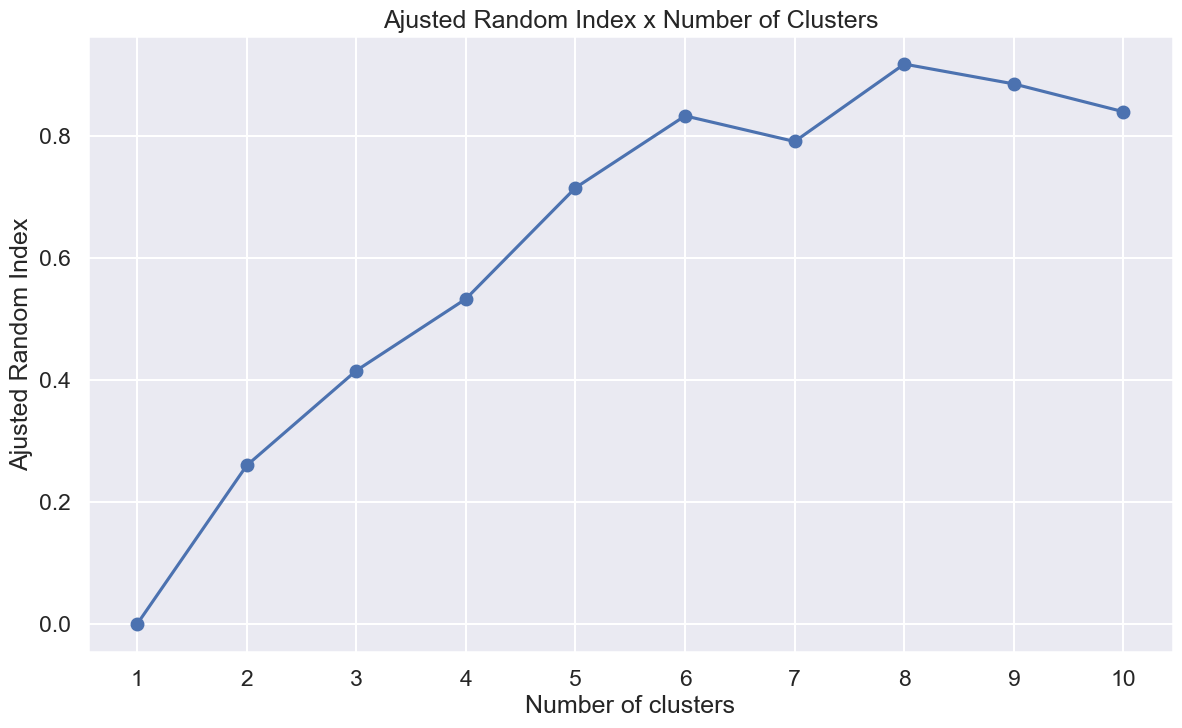

CPU times: total: 15.7 s
Wall time: 684 ms


In [17]:
%%time
do_ajusted_random_index_and_plot(df, max_clusters=10)

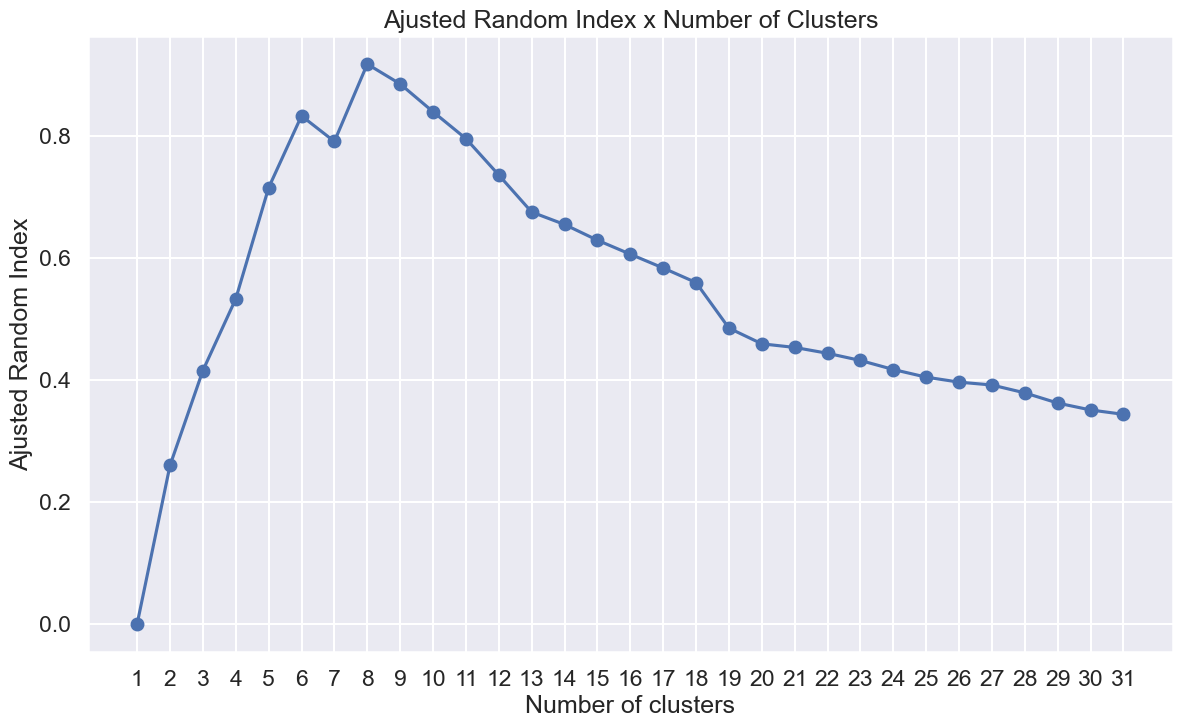

CPU times: total: 44.4 s
Wall time: 2 s


In [18]:
%%time
do_ajusted_random_index_and_plot(df, max_clusters=int(np.sqrt(len(df))))

## Execution with a dataset of 1M records:

In [19]:
X, y = make_blobs(n_samples=1000000, centers=7, n_features=2,
                  random_state=33)

df = pd.DataFrame(X, columns=['x', 'y'])

df.head()

x         y
0 -9.507284  7.336711
1 -5.079856 -2.823110
2 -2.155830 -5.106045
3  1.812118 -0.337578
4  8.453084 -5.795128

In [20]:
start = time.time()
model = KMeans(n_clusters=7, algorithm='lloyd', random_state=33, n_init='auto')
model.fit(df)
print(time.time() - start)

0.3716256618499756


In [21]:
print('Ajusted Random Index:', round(adjusted_rand_score(y, model.labels_), 4))

Ajusted Random Index: 0.9707


## Some limitations
Results of the evaluation of runs where K-means is limited.

In [22]:
transformation = [[0.3, -0.3], [-1.2, 0.2]]

X, y = make_blobs(n_samples=1000, centers=7, n_features=2,
                  random_state=170)

df_transformed = pd.DataFrame(np.dot(X, transformation), columns=['x', 'y'])
df_transformed['label'] = y

df_transformed.head()

x         y  label
0   3.775776 -2.551136      4
1   4.798597 -1.459384      5
2   3.910070  1.590275      0
3   5.554648  1.009466      0
4 -10.997360  2.443557      6

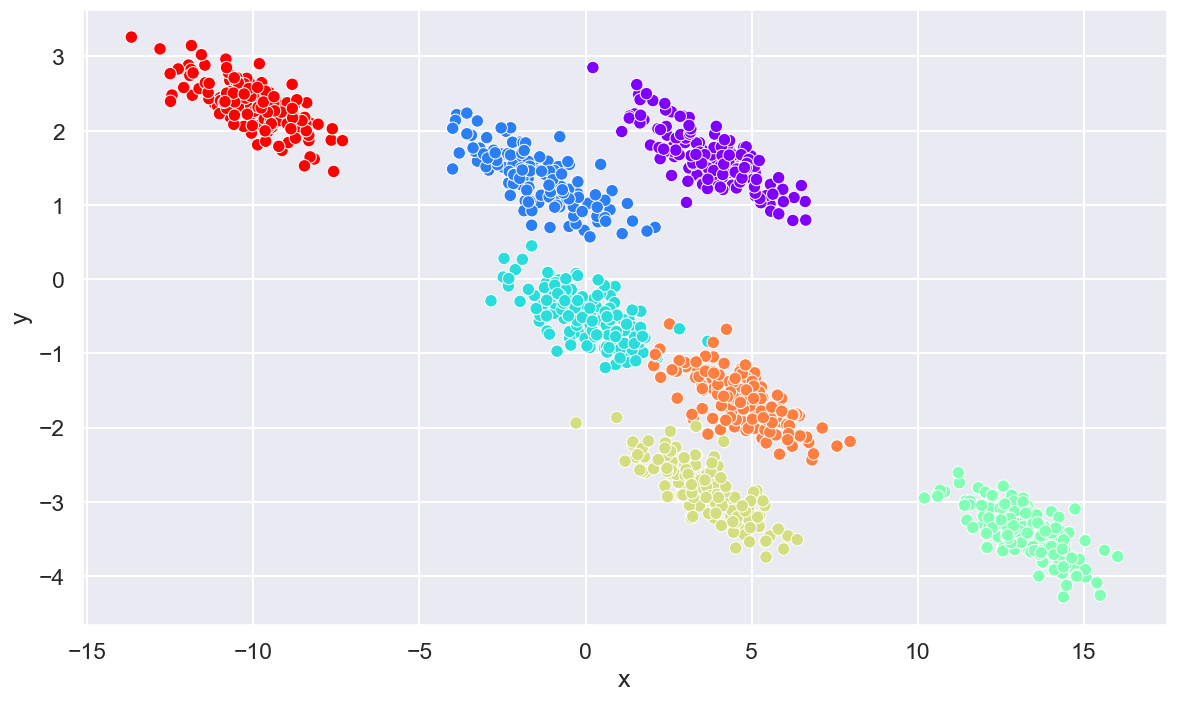

In [23]:
_ = sns.scatterplot(x='x', y='y', data=df_transformed, hue='label', palette='rainbow', legend=False)

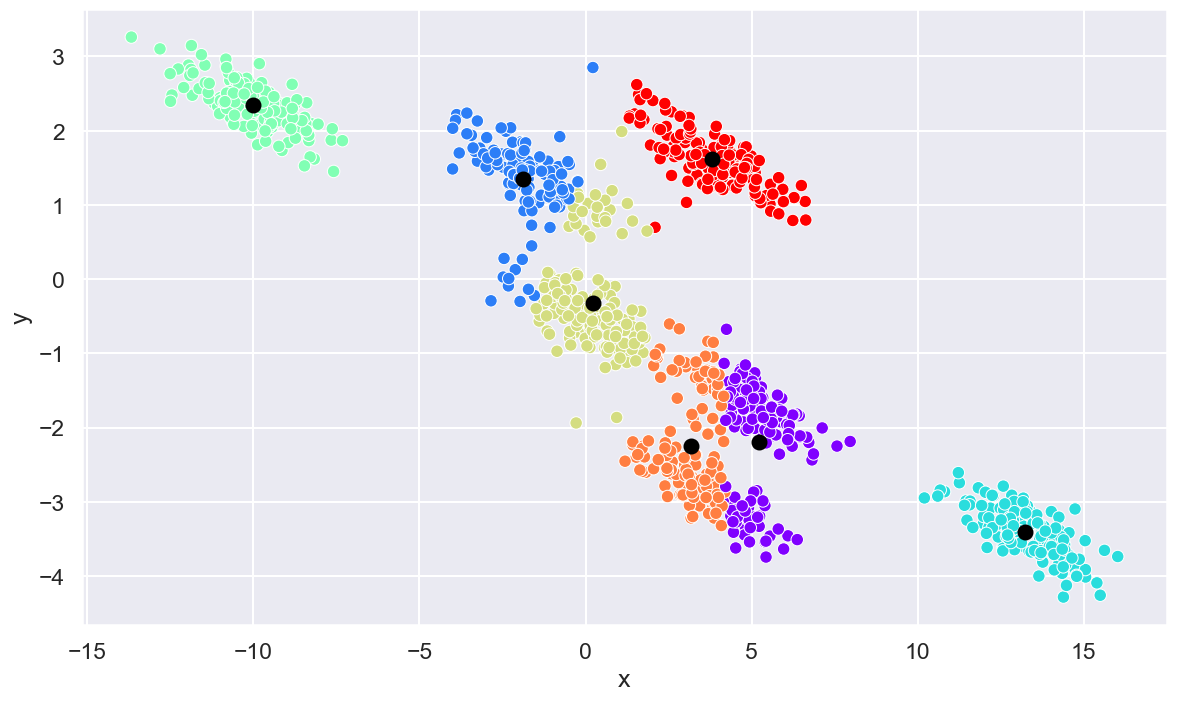

In [24]:
_, clusters_labels = train_and_plot(df_transformed, k=7)

In [25]:
print('Adjusted Rand Index', round(adjusted_rand_score(y, clusters_labels), 4))

Adjusted Rand Index 0.7687


## Evaluating datasets with different group formats:

In [26]:
X, y = make_moons(300, noise=.05, random_state=33)

df_moon = pd.DataFrame(X, columns=['x', 'y'])
df_moon['label'] = y

df_moon.head()

x         y  label
0  0.449533 -0.403077      1
1  1.860595  0.011092      1
2  1.842407 -0.086292      1
3  1.395956 -0.438878      1
4  0.479125  0.926415      0

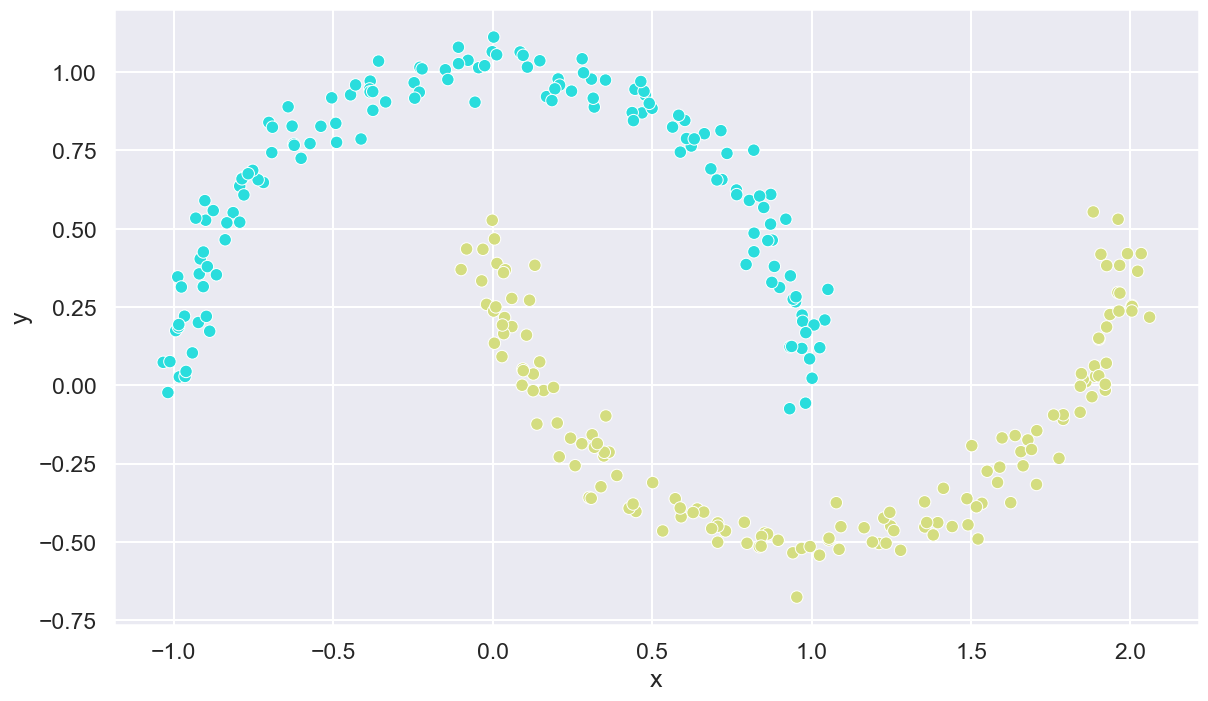

In [27]:
_ = sns.scatterplot(x='x', y='y', data=df_moon, hue='label', palette='rainbow', legend=False)

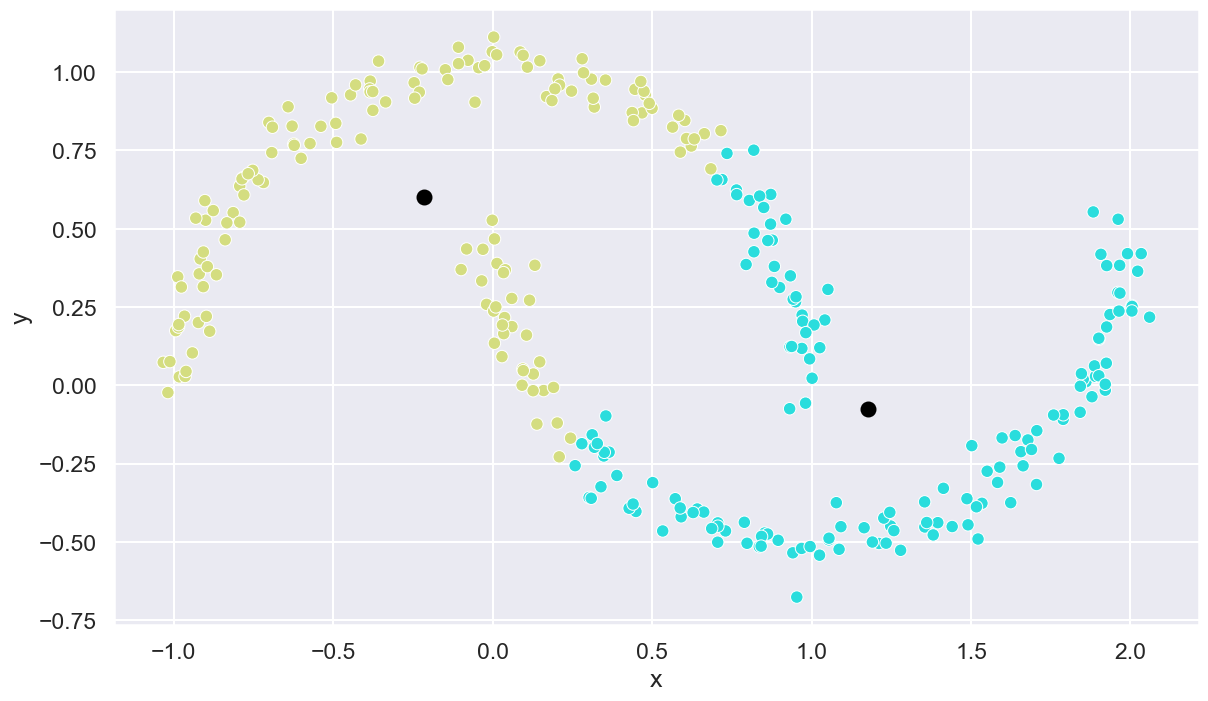

In [28]:
_, clusters_labels = train_and_plot(df_moon, k=2)

In [29]:
print('Adjusted Rand Index', round(adjusted_rand_score(y, clusters_labels), 4))

Adjusted Rand Index 0.268


<br><br><br><br>

# Internal Evaluation Index:
---

In [30]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors

from sklearn.cluster import KMeans
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs

from sklearn.metrics import silhouette_score

%matplotlib inline

sns.set(style='darkgrid', context='talk', rc={'figure.figsize': (14, 8)})

## Creating Synthetic Dataset:

In [31]:
X, y = make_blobs(n_samples=1000, centers=7, n_features=2,
                  random_state=33)

df = pd.DataFrame(X, columns=['x', 'y'])
df['label'] = y

df.head()

x         y  label
0   7.415416 -5.293543      2
1  -3.898435 -0.410129      0
2  -6.065070 -0.514075      0
3  -7.980452  8.115292      3
4  10.479860 -0.900095      5

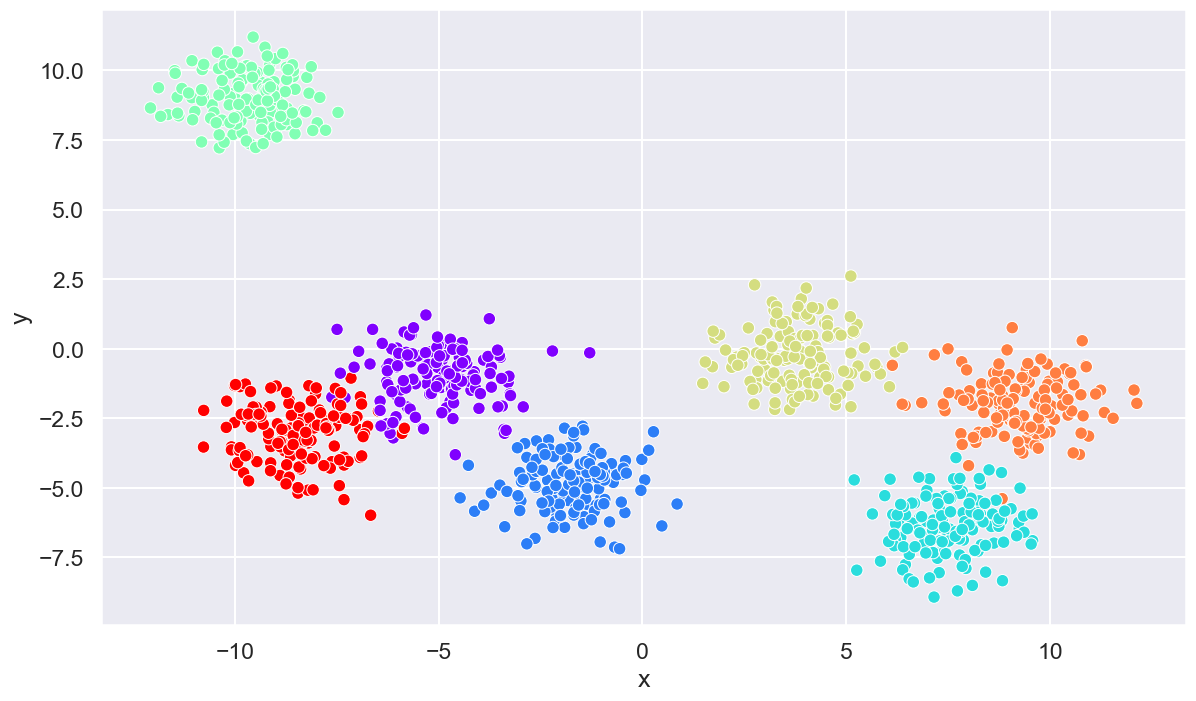

In [32]:
_ = sns.scatterplot(x='x', y='y', data=df, hue='label', palette='rainbow', legend=False)

## Creating Function to Test KMeans:

In [33]:
import warnings

def train_and_plot(data, k=3, init='k-means++', n_init=10, max_iter=300,
                   algorithm='auto', verbose=0, random_state=133):
    
    #Ignoring the warnings because KMeans have a memory leak.
    warnings.filterwarnings('ignore')
    
    # Copiamos os dados e removemos a coluna label 
    data_copy = data.copy()
    data_copy.drop(columns='label', inplace=True)
    
    model = KMeans(n_clusters=k, init=init, n_init=n_init, max_iter=max_iter,
                   algorithm=algorithm, random_state=random_state, verbose=verbose)
    model.fit(data_copy)
    
    data_copy['cluster_labels'] = model.labels_
    _ = sns.scatterplot(x='x', y='y', data=data_copy, hue='cluster_labels', palette='rainbow', legend=False)

    centroids = model.cluster_centers_
    centroids_x = centroids[:,0]
    centroids_y = centroids[:,1]

    _ = plt.scatter(centroids_x, centroids_y, color='black', s=100)
    
    warnings.filterwarnings('default')
    
    return model, model.labels_

## Internal Index Example:

### Silhouette Coefficient

### With the right number of clusters, the resulting groups are very similar to the ground truth.
---

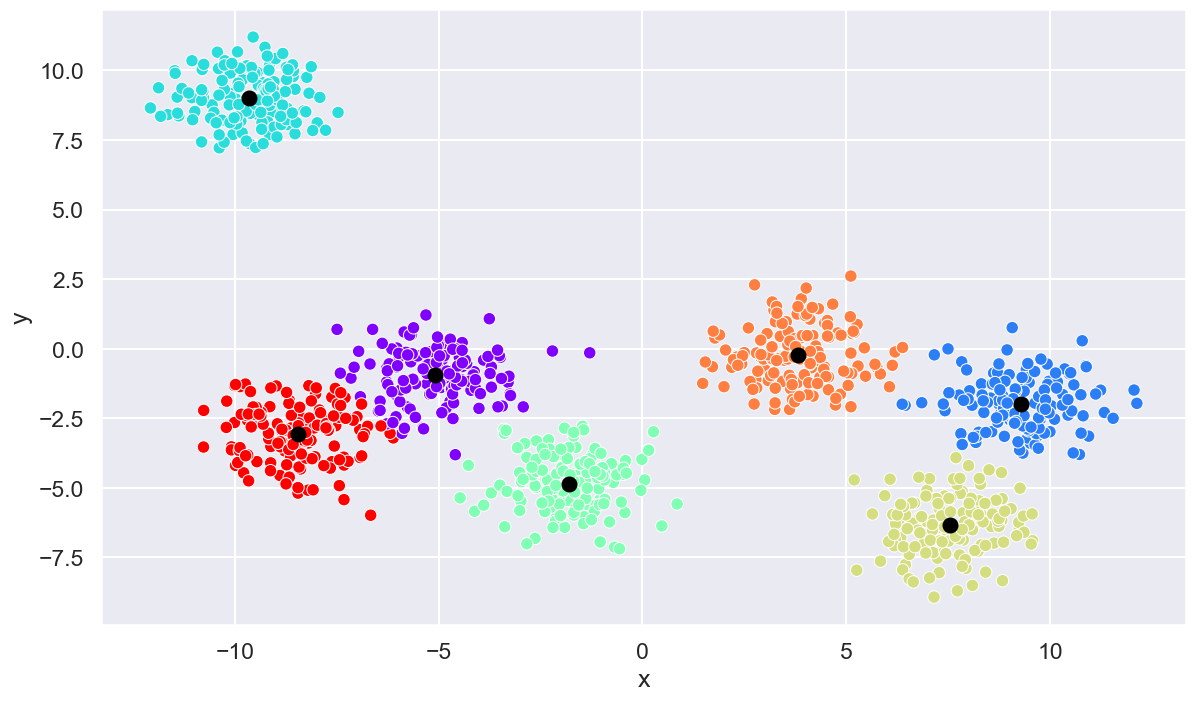

In [34]:
_, clusters_labels = train_and_plot(df, k=7)

In [35]:
print('Silhouette Coefficient', round(silhouette_score(X, clusters_labels), 2))

Silhouette Coefficient 0.65


### With random initialization, the resulting groups are less similar to the ground truth.
---

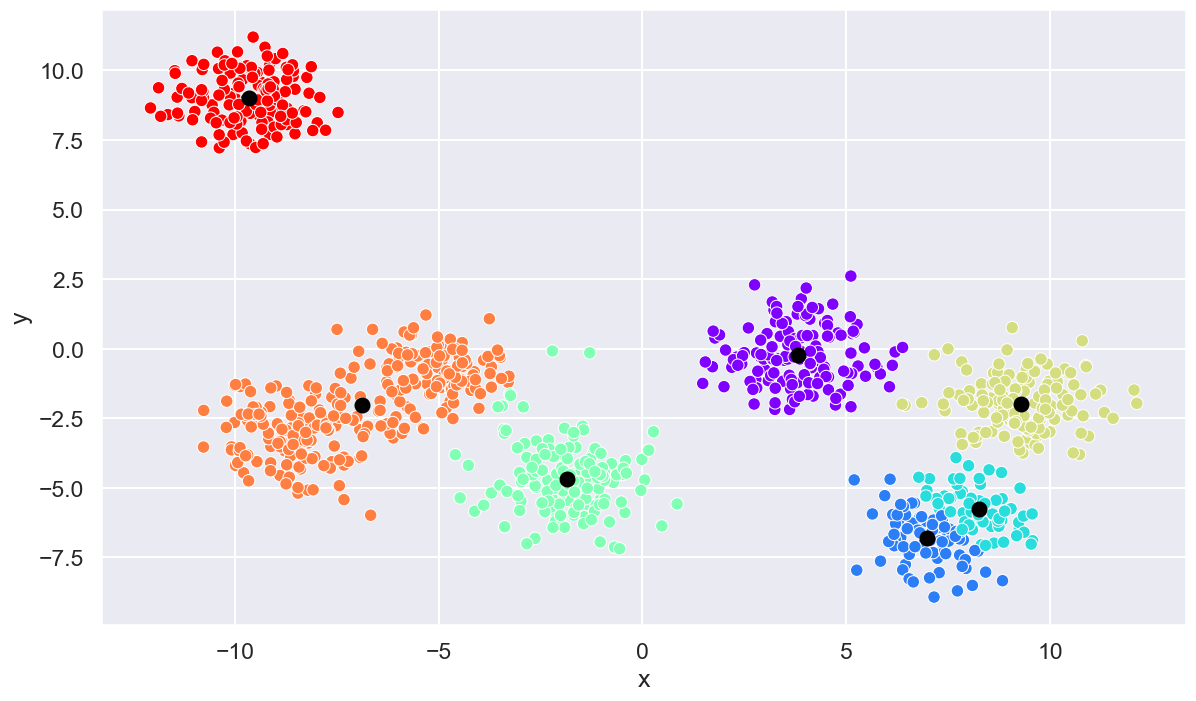

In [36]:
_, clusters_labels = train_and_plot(df, k=7, init='random', random_state=100)

In [37]:
print('Silhouette Coefficient', round(silhouette_score(X, clusters_labels), 2))

Silhouette Coefficient 0.59


### With an incorrect number of groups, where the resulting number of groups is less than the actual number of groups.
---

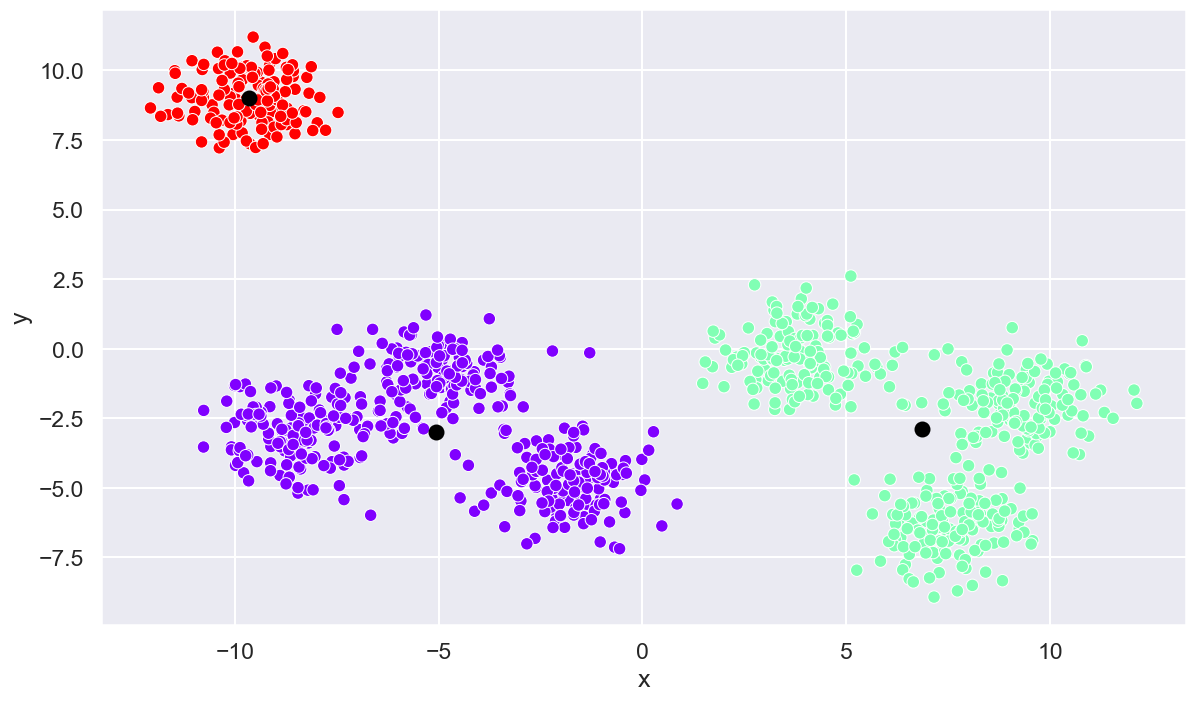

In [38]:
_, clusters_labels = train_and_plot(df, k=3)

In [39]:
print('Silhouette Coefficient', round(silhouette_score(X, clusters_labels), 2))

Silhouette Coefficient 0.64


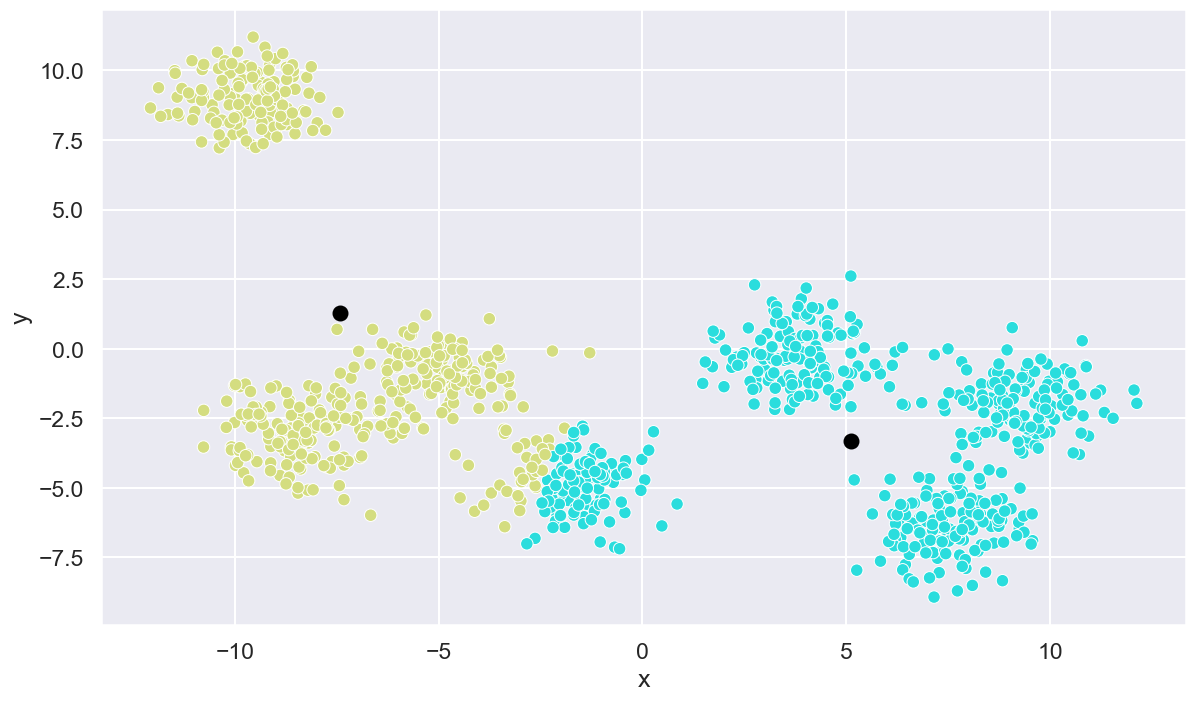

In [40]:
_, clusters_labels = train_and_plot(df, k=2, random_state=90)

In [41]:
print('Silhouette Coefficient', round(silhouette_score(X, clusters_labels), 2))

Silhouette Coefficient 0.52


### With an incorrect number of groups, where the resulting number of groups is greater than the actual number of groups.
---

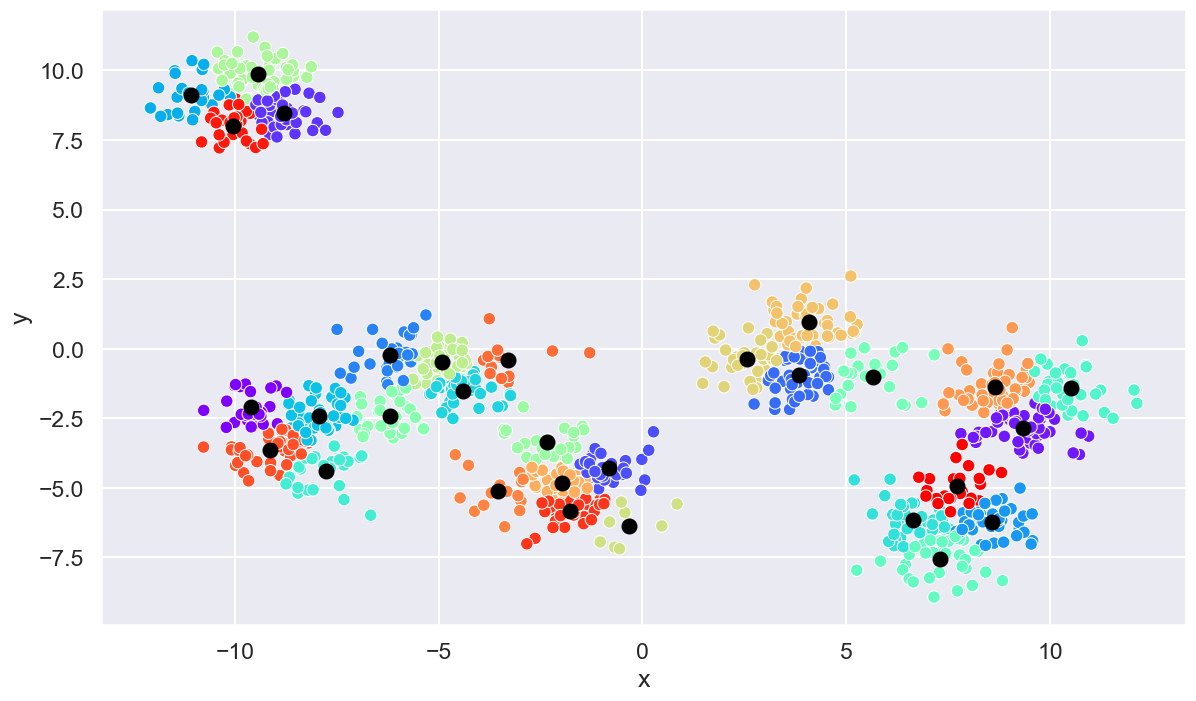

In [42]:
_, clusters_labels = train_and_plot(df, k=30)

In [43]:
print('Silhouette Coefficient', round(silhouette_score(X, clusters_labels), 2))

Silhouette Coefficient 0.35


## Plot Tests with the Internal Index:
---
It can be very useful to see a graph of the index varying by the number of clusters.

In [44]:
import warnings

def do_silhouette_and_plot(data, max_clusters):
    
    warnings.filterwarnings('ignore')
    
    min_clusters = 2

    clusters_range = range(min_clusters, max_clusters + 1)

    silhouettes = []
    data_copy = data.copy()
    data_copy.drop(columns='label', inplace=True)

    for k in clusters_range:
        model = KMeans(n_clusters=k, random_state=33)
        model.fit(data_copy)
        
        s = silhouette_score(data, model.labels_)
        silhouettes.append(s)
        
    _ = plt.plot(clusters_range, silhouettes, '-o')
    _ = plt.title('Silhouette x Number of Clusters')
    _ = plt.xlabel('Number of Clusters')
    _ = plt.ylabel('Silhouette')
    _ = plt.xticks(clusters_range)
    
    warnings.filterwarnings('default')
    
    plt.show()

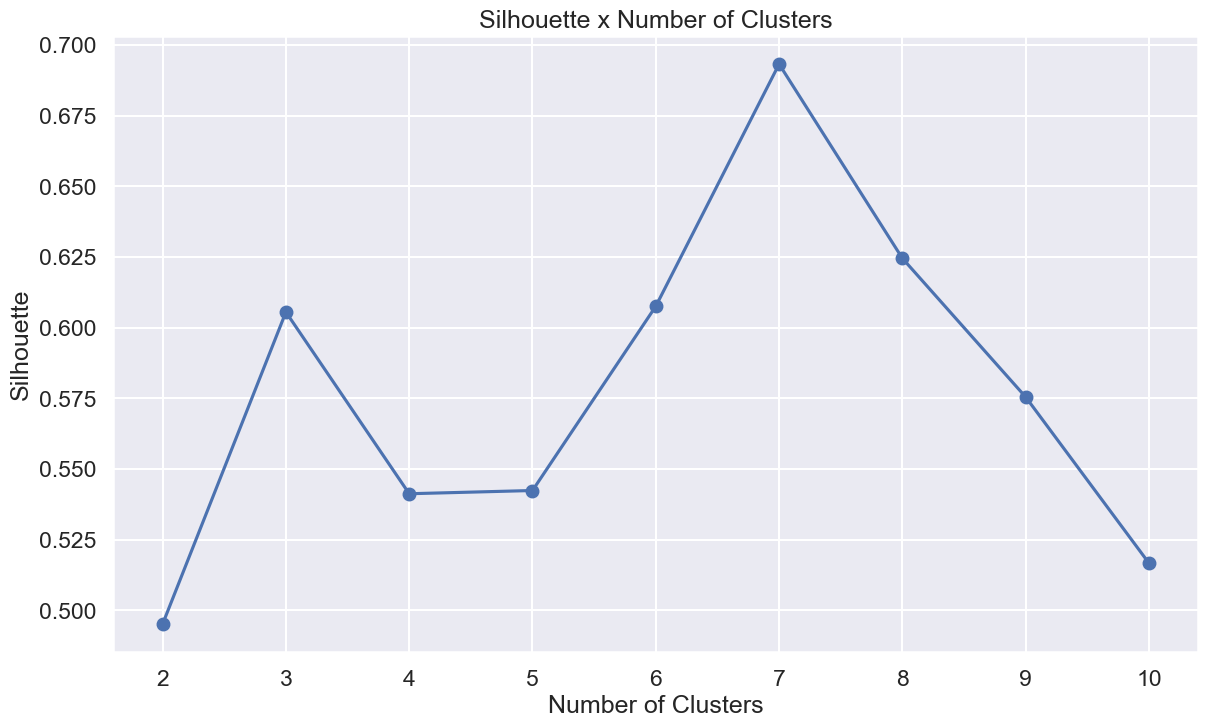

CPU times: total: 57 s
Wall time: 3.09 s


In [45]:
%%time

do_silhouette_and_plot(df, max_clusters=10)

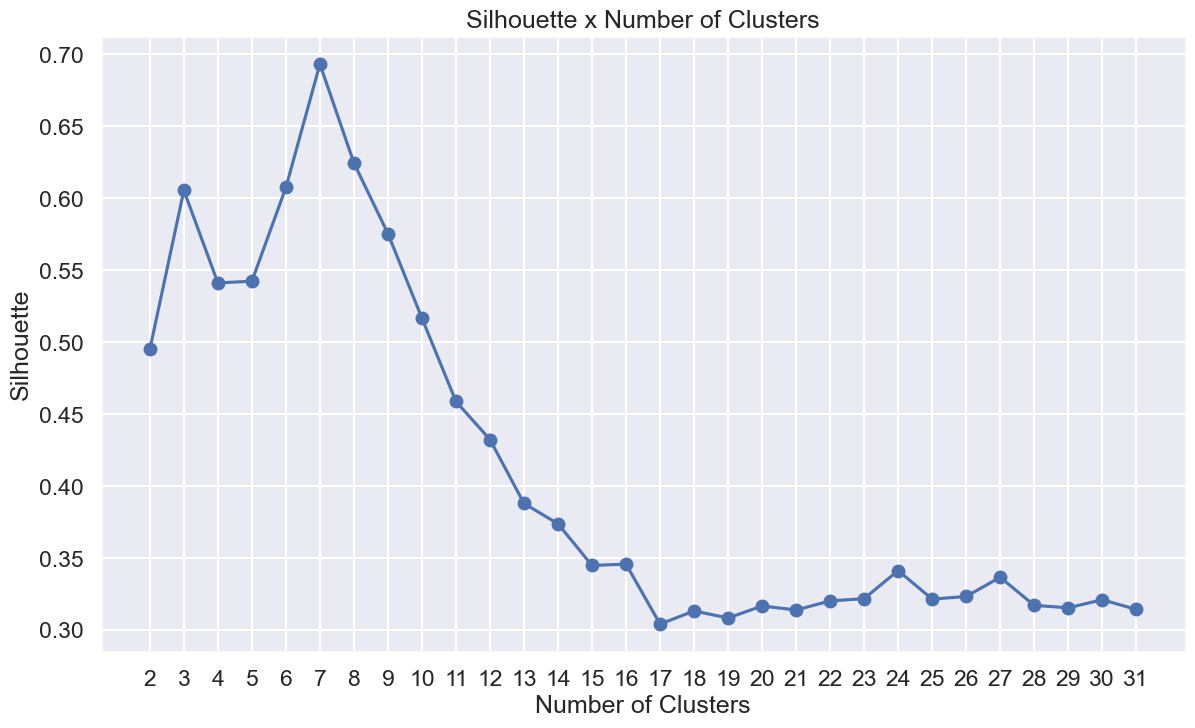

CPU times: total: 3min 10s
Wall time: 10.6 s


In [46]:
%%time

do_silhouette_and_plot(df, max_clusters=int(np.sqrt(len(df))))

<br>

## Some limitations
---
Results of the evaluation of runs where K-means is limited.

In [47]:
transformation = [[0.3, -0.3], [-1.2, 0.2]]

X, y = make_blobs(n_samples=1000, centers=7, n_features=2,
                  random_state=170)

df_transformed = pd.DataFrame(np.dot(X, transformation), columns=['x', 'y'])
df_transformed['label'] = y

df_transformed.head()

x         y  label
0   3.775776 -2.551136      4
1   4.798597 -1.459384      5
2   3.910070  1.590275      0
3   5.554648  1.009466      0
4 -10.997360  2.443557      6

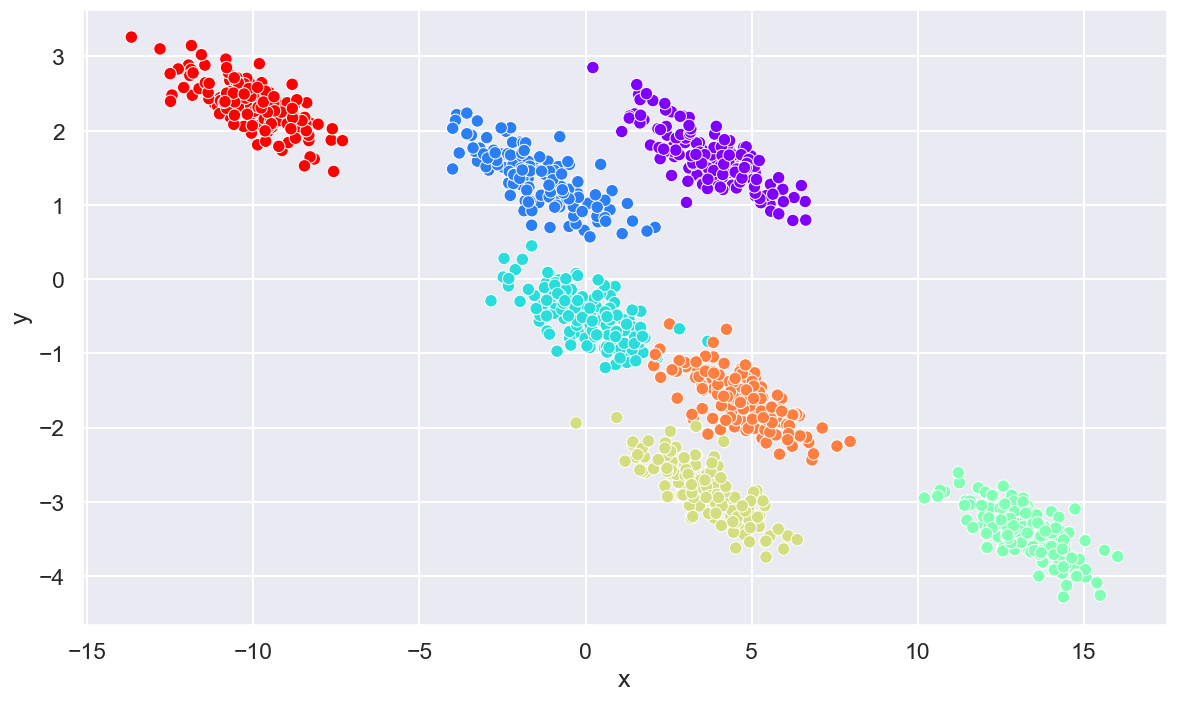

In [48]:
_ = sns.scatterplot(x='x', y='y', data=df_transformed, hue='label', palette='rainbow', legend=False)

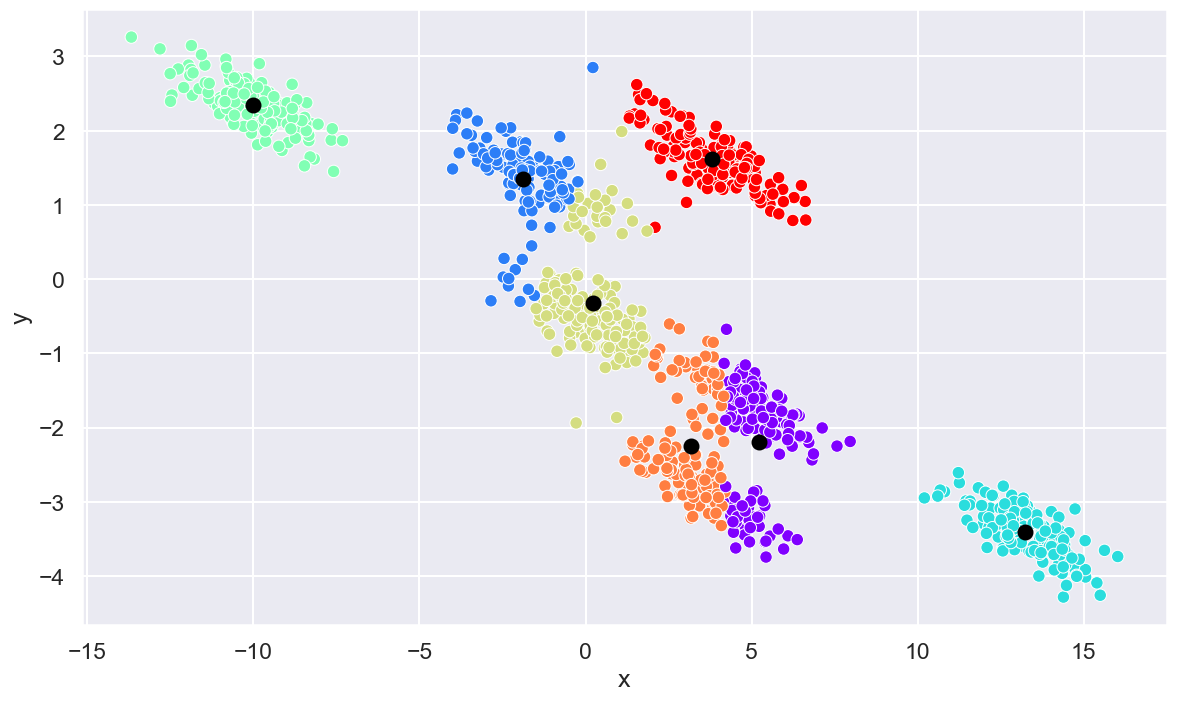

In [49]:
_, clusters_labels = train_and_plot(df_transformed, k=7)

In [50]:
print('Silhouette Coefficient', round(silhouette_score(X, clusters_labels), 2))

Silhouette Coefficient 0.51


Silhouette Coefficient 0.55


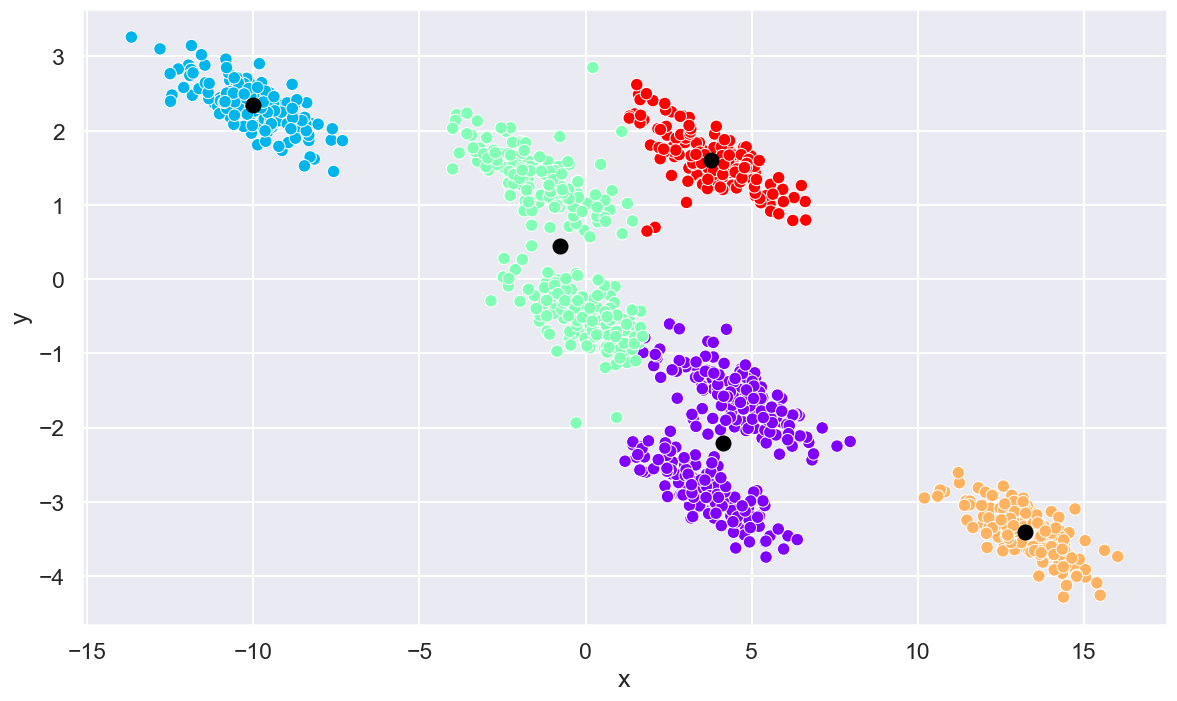

In [51]:
_, clusters_labels = train_and_plot(df_transformed, k=5)
print('Silhouette Coefficient', round(silhouette_score(X, clusters_labels), 2))

Silhouette Coefficient 0.33


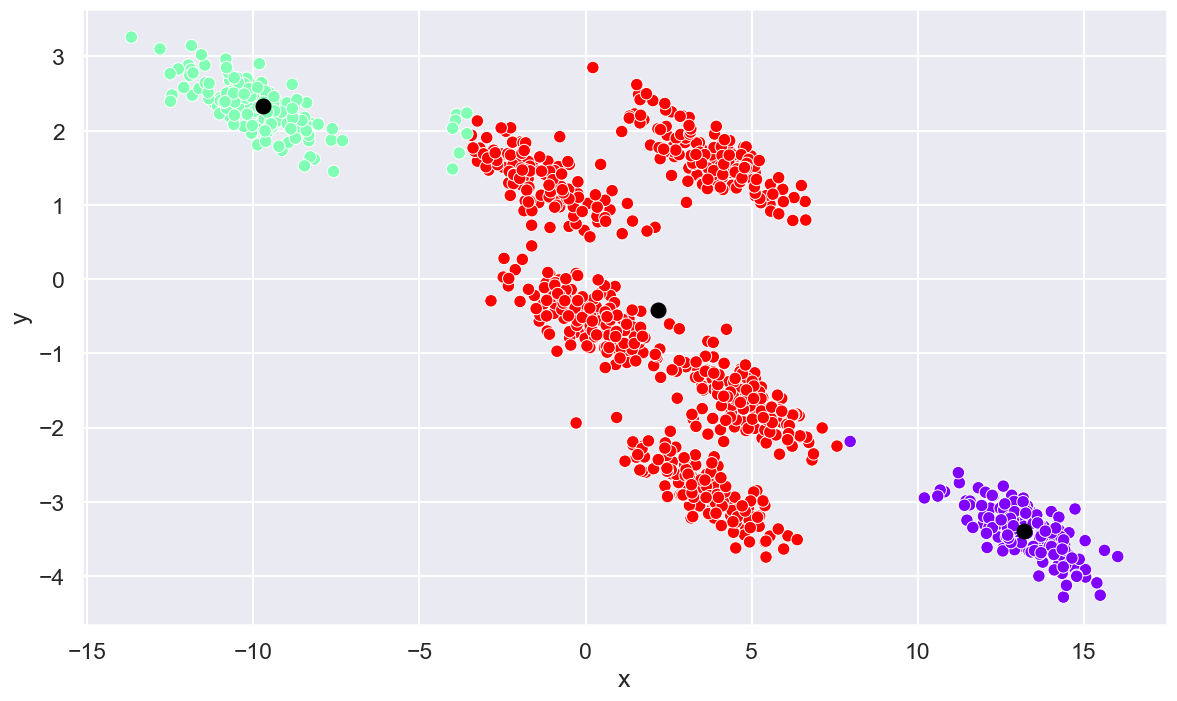

In [52]:
_, clusters_labels = train_and_plot(df_transformed, k=3)
print('Silhouette Coefficient', round(silhouette_score(X, clusters_labels), 2))

## Evaluating Datasets with Different Group Formats:
---

In [53]:
X, y = make_moons(300, noise=.05, random_state=33)

df_moon = pd.DataFrame(X, columns=['x', 'y'])
df_moon['label'] = y

df_moon.head()

x         y  label
0  0.449533 -0.403077      1
1  1.860595  0.011092      1
2  1.842407 -0.086292      1
3  1.395956 -0.438878      1
4  0.479125  0.926415      0

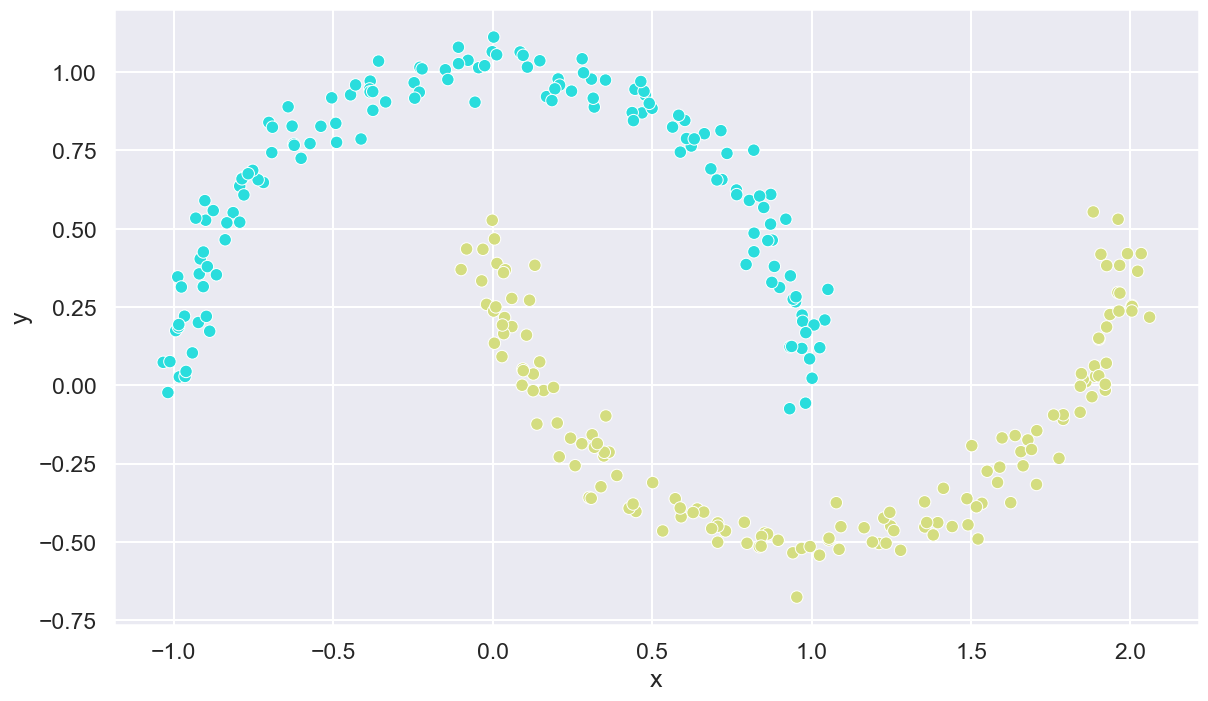

In [54]:
_ = sns.scatterplot(x='x', y='y', data=df_moon, hue='label', palette='rainbow', legend=False)

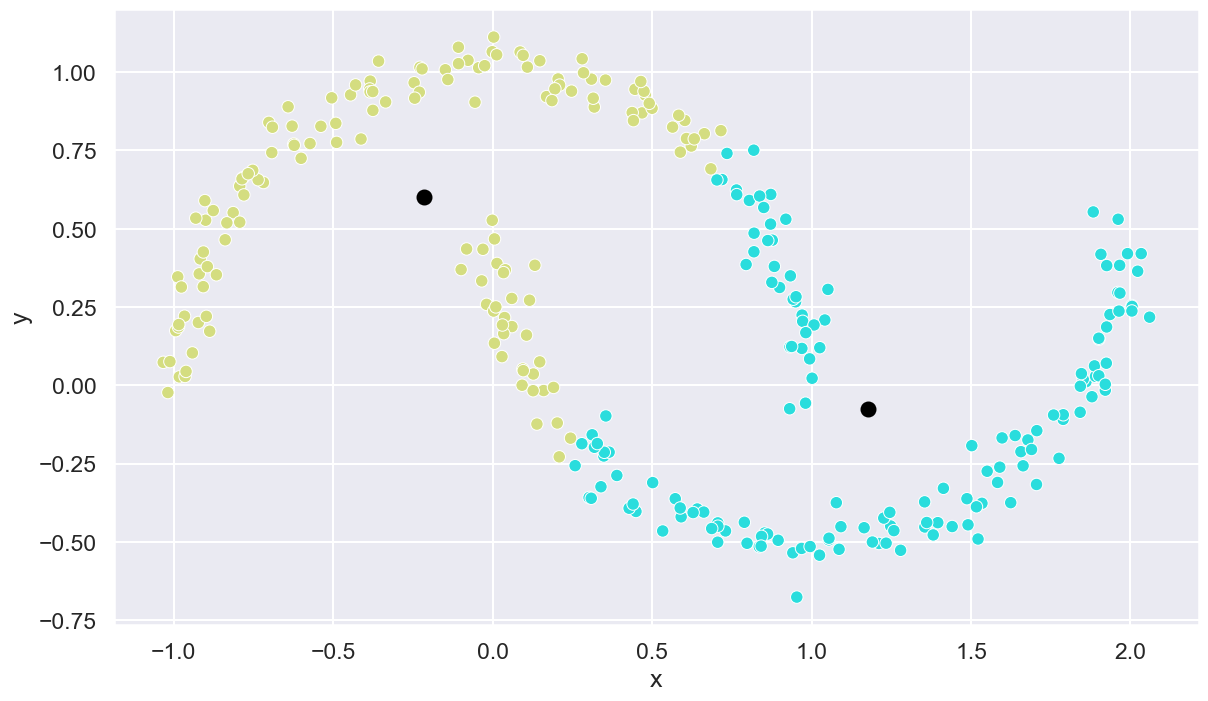

In [55]:
_, clusters_labels = train_and_plot(df_moon, k=2)

In [56]:
print('Silhouette Coefficient', round(silhouette_score(X, clusters_labels), 2))

Silhouette Coefficient 0.49


## Noisy/random Dataset:

In [57]:
# We created a dataset with 1000 instances and two features
random_data = np.random.rand(500, 2)

df_random = pd.DataFrame(random_data, columns=['x', 'y'])
df_random['label'] = None
df_random.head()

x         y label
0  0.900064  0.197179  None
1  0.261869  0.732456  None
2  0.420716  0.710863  None
3  0.386012  0.698932  None
4  0.928410  0.396598  None

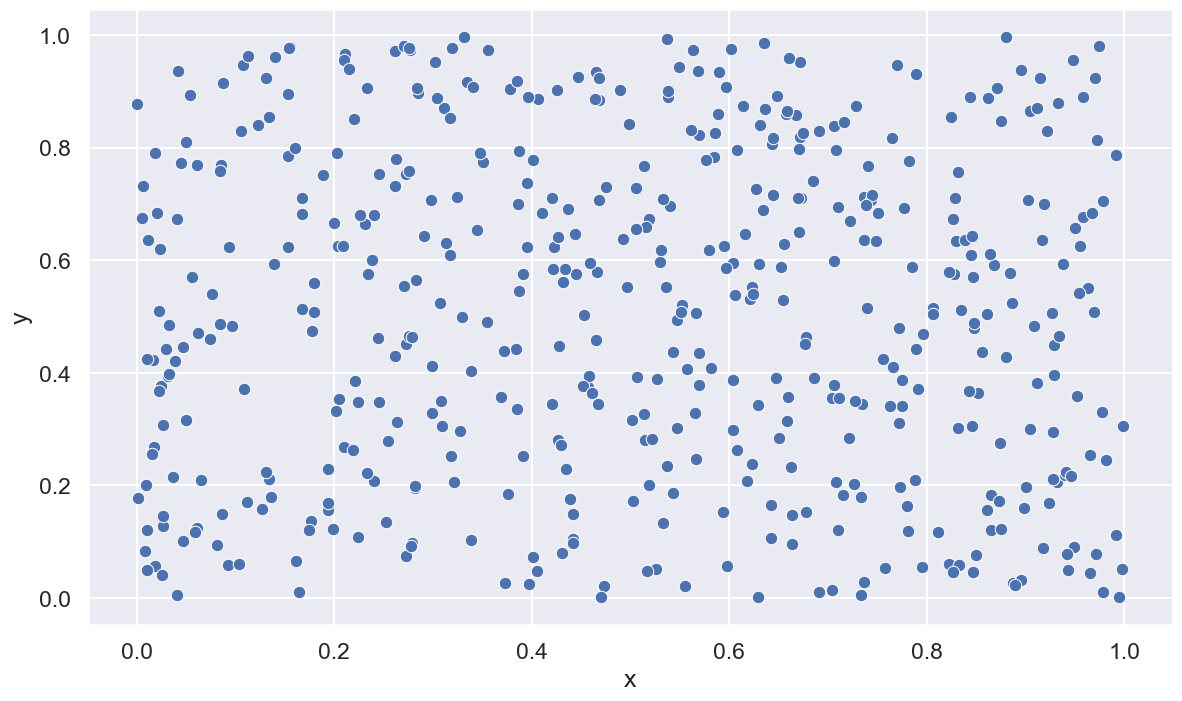

In [58]:
_ = sns.scatterplot(x='x', y='y', data=df_random, legend=False)

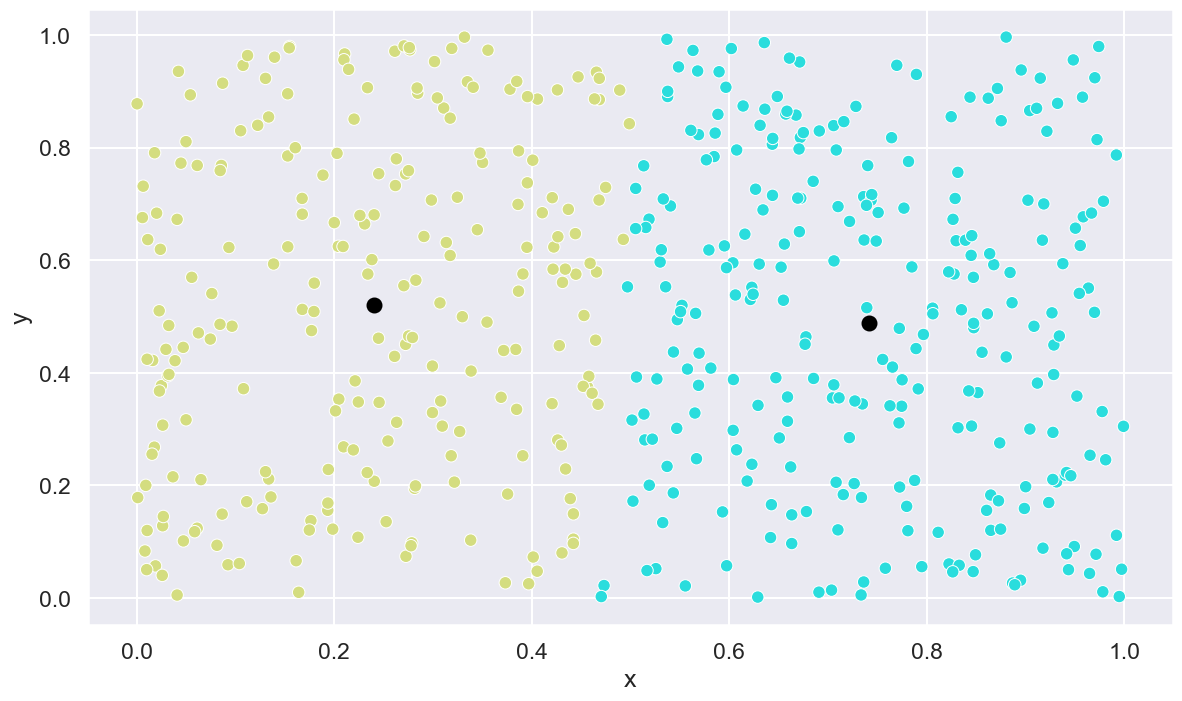

In [59]:
_, clusters_labels = train_and_plot(df_random, k=2)

In [60]:
print('Silhouette Coefficient', round(silhouette_score(random_data, clusters_labels), 2))

Silhouette Coefficient 0.35


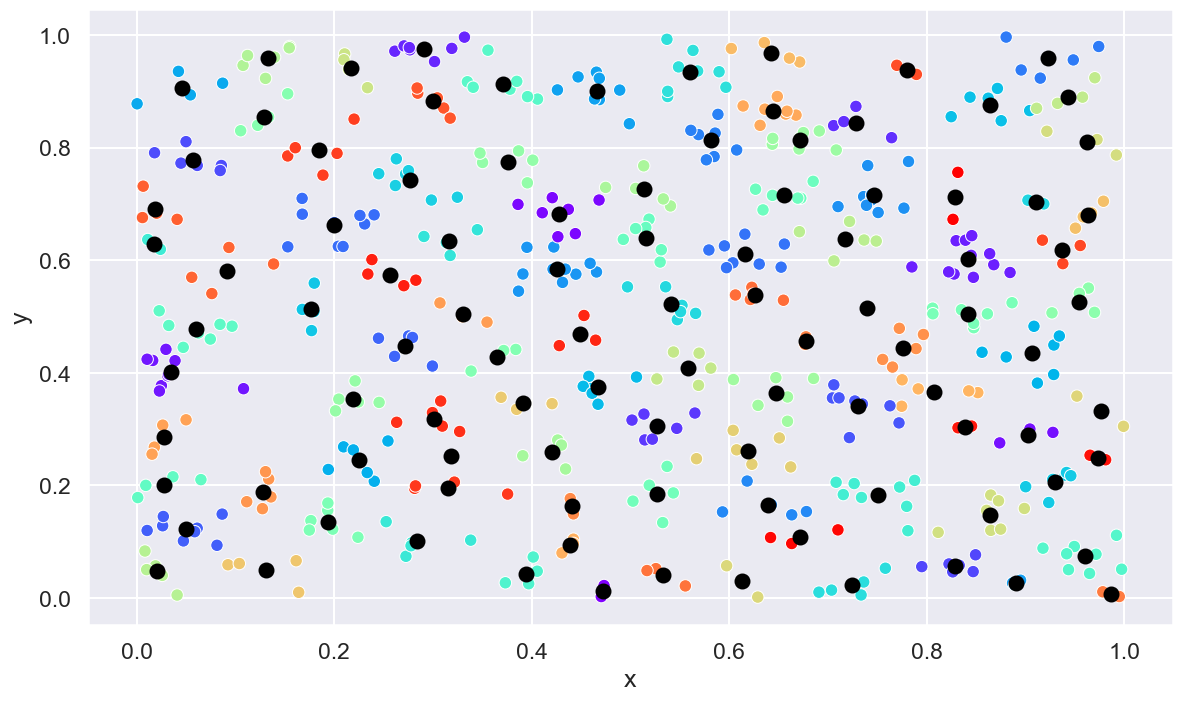

In [61]:
_, clusters_labels = train_and_plot(df_random, k=100)

In [62]:
print('Silhouette Coefficient', round(silhouette_score(random_data, clusters_labels), 2))

Silhouette Coefficient 0.41


# Relative Evaluation Index
---

I'm importing all the libraries used each time because the chapters can be read separately.

In [63]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs

from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

%matplotlib inline

sns.set(style='darkgrid', context='talk', rc={'figure.figsize': (14, 8)})

## Creating Synthetic Dataset:

In [2]:
X, y = make_blobs(n_samples=1000, centers=7, n_features=2,
                  random_state=33)

df = pd.DataFrame(X, columns=['x', 'y'])
df['label'] = y

df.head()

x         y  label
0   7.415416 -5.293543      2
1  -3.898435 -0.410129      0
2  -6.065070 -0.514075      0
3  -7.980452  8.115292      3
4  10.479860 -0.900095      5

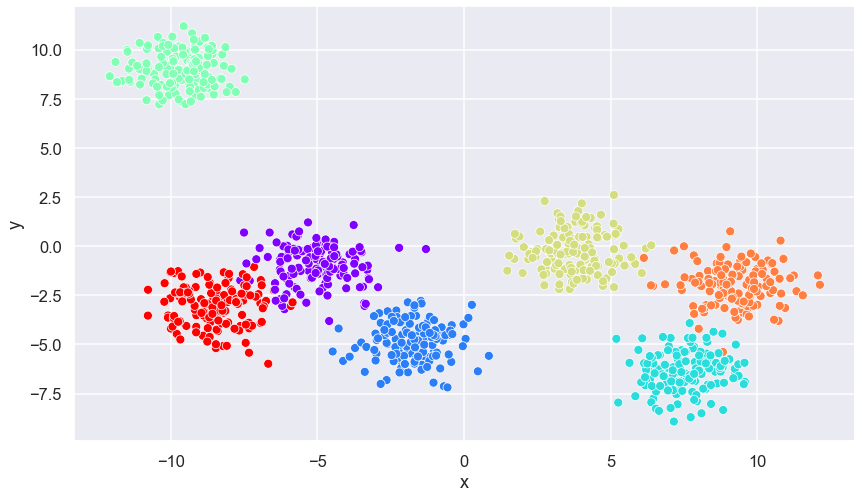

In [3]:
_ = sns.scatterplot(x='x', y='y', data=df, hue='label', palette='rainbow', legend=False)

### Creating Method to Test KMeans and Plot:

This method was created based on a example used at Scikit-Learn.

In [65]:
import warnings

def train_and_plot_with_silhouette(data, k=3, init='k-means++', n_init=10, max_iter=300,
                                   algorithm='auto', verbose=0, random_state=133):
    # Ignoring the warning of KMeans Memory Leak
    warnings.filterwarnings('ignore')
    
    # Copying the data and removing the label
    data_copy = data.copy()
    data_copy.drop(columns='label', inplace=True)
    
    model = KMeans(n_clusters=k, init=init, n_init=n_init, max_iter=max_iter,
                   algorithm=algorithm, random_state=random_state, verbose=verbose)
    model.fit(data_copy)
    
    plot_silhouette(data_copy, model)
    
    return model, model.labels_

def plot_silhouette(data, model):
    """
    Method from Scikit-learn with some changes.
    Source: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
    """
    k = model.n_clusters
    cluster_labels = model.labels_
    centroids = model.cluster_centers_
    X = data.values
    
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (k + 1) * 10])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print('For K =', k,
          'the Average Silhouette Score is:', silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title('The Silhouette Plot for several groups.')
    ax1.set_xlabel('The Silhouette Coefficient Values')
    ax1.set_ylabel('Cluster')

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color='red', linestyle='--')

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / k)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Draw white circles at cluster centers
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centroids):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title('Visualizing the Clustered Data.')

    plt.suptitle(('Silhouette Analysis of KMeans '
                  'K = %d' % k),
                 fontsize=14, fontweight='bold')

    warnings.filterwarnings('default')
    
    plt.show()

## Example of Relative Intern Index

#### Silhouette Coefficient

With the right number of clusters, the resulting groups are very similar to the ground truth.

For K = 7 the Average Silhouette Score is: 0.6478900968149082


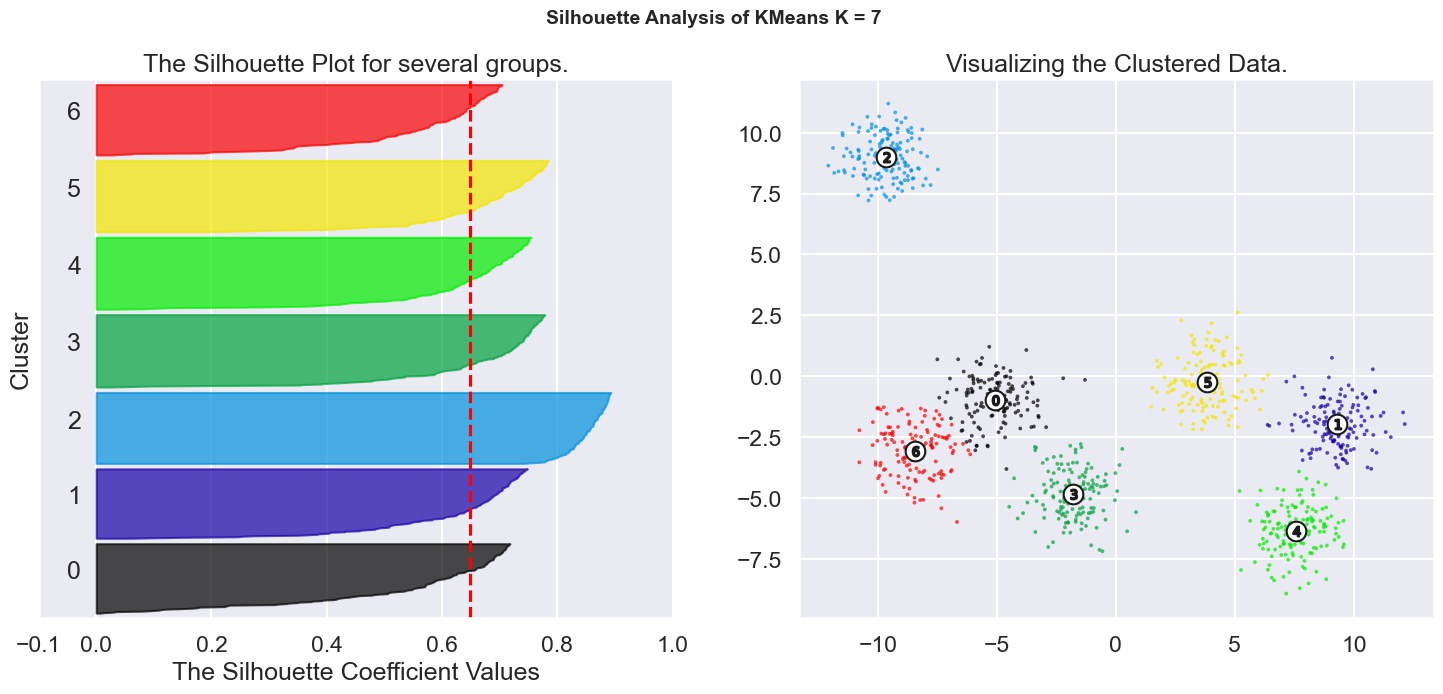

In [66]:
_, clusters_labels = train_and_plot_with_silhouette(df, k=7)

With random initialization, the resulting groups are less similar to the ground truth.

For K = 7 the Average Silhouette Score is: 0.587372361145171


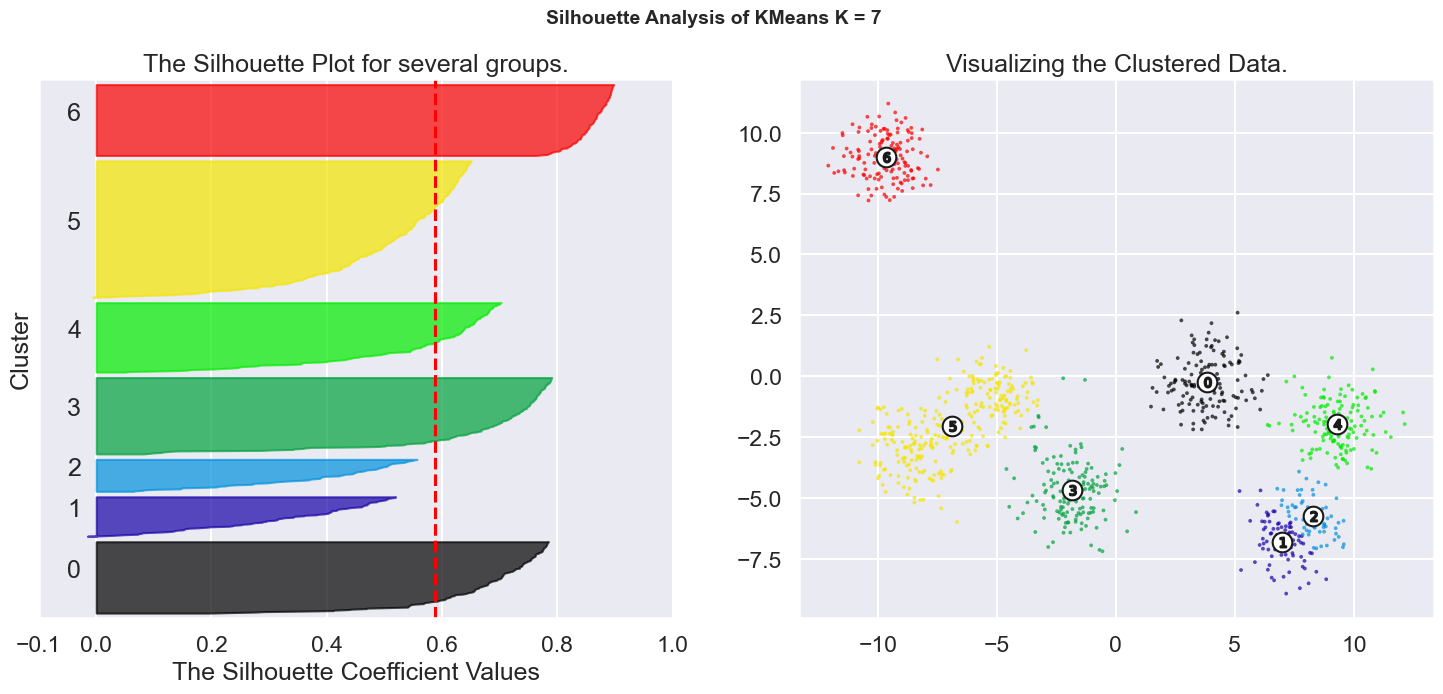

In [67]:
_, clusters_labels = train_and_plot_with_silhouette(df, k=7, init='random', random_state=100)

With an incorrect number of groups, where the resulting number of groups is less than the actual number of groups.

For K = 3 the Average Silhouette Score is: 0.6411375499729021


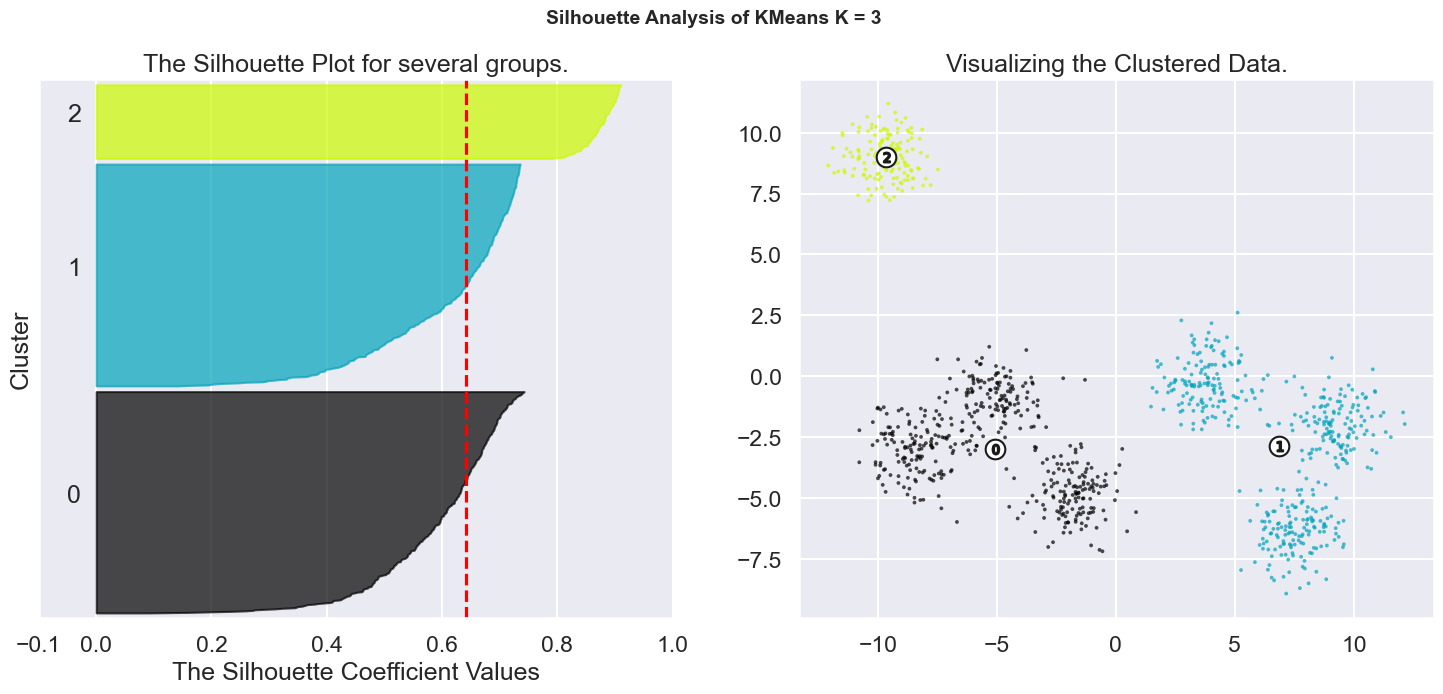

In [68]:
_, clusters_labels = train_and_plot_with_silhouette(df, k=3)

With an incorrect number of groups, where the resulting number of groups is greater than the actual number of groups.

For K = 30 the Average Silhouette Score is: 0.34919585946858717


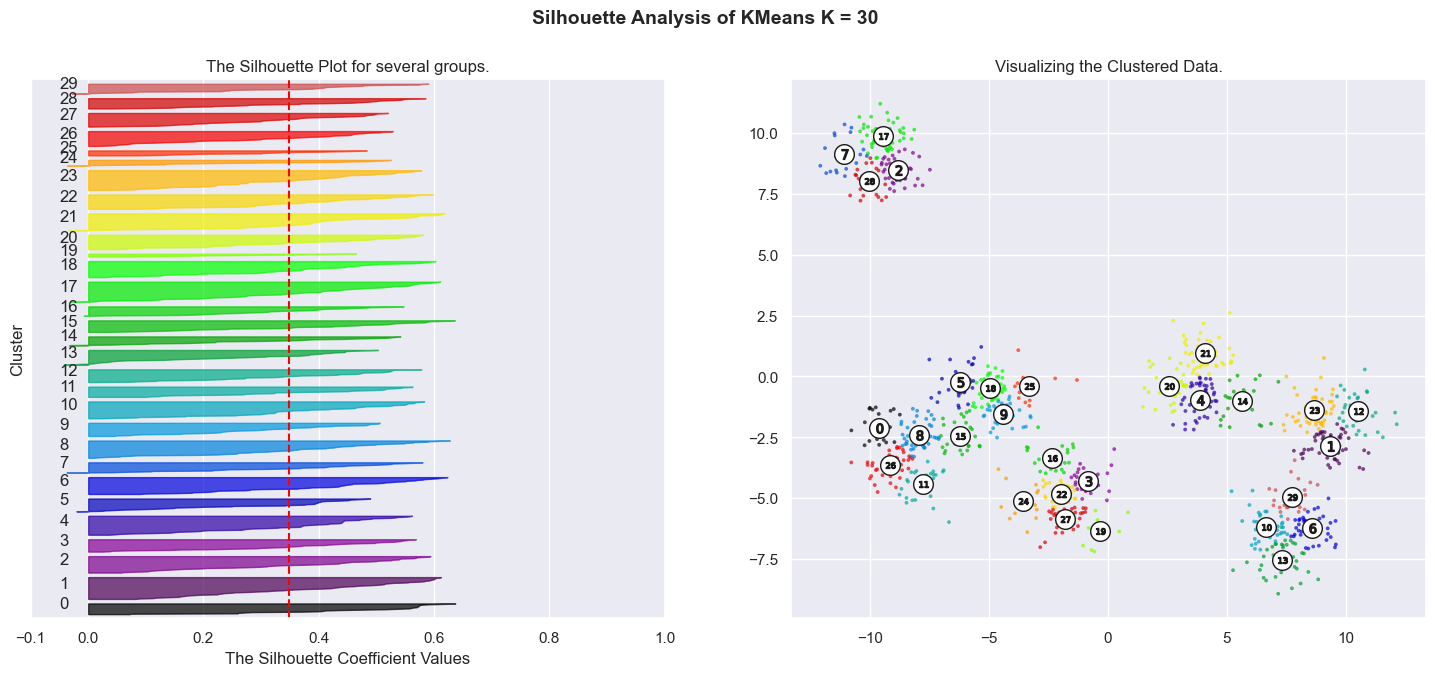

In [69]:
sns.set(style='darkgrid')
_, clusters_labels = train_and_plot_with_silhouette(df, k=30)

## Some limitations
Results of the evaluation of runs where K-means is limited.

In [70]:
sns.set(style='darkgrid', context='talk', rc={'figure.figsize': (14, 8)})

In [71]:
transformation = [[0.3, -0.3], [-1.2, 0.2]]

X, y = make_blobs(n_samples=1000, centers=7, n_features=2,
                  random_state=170)

df_transformed = pd.DataFrame(np.dot(X, transformation), columns=['x', 'y'])
df_transformed['label'] = y

df_transformed.head()

x         y  label
0   3.775776 -2.551136      4
1   4.798597 -1.459384      5
2   3.910070  1.590275      0
3   5.554648  1.009466      0
4 -10.997360  2.443557      6

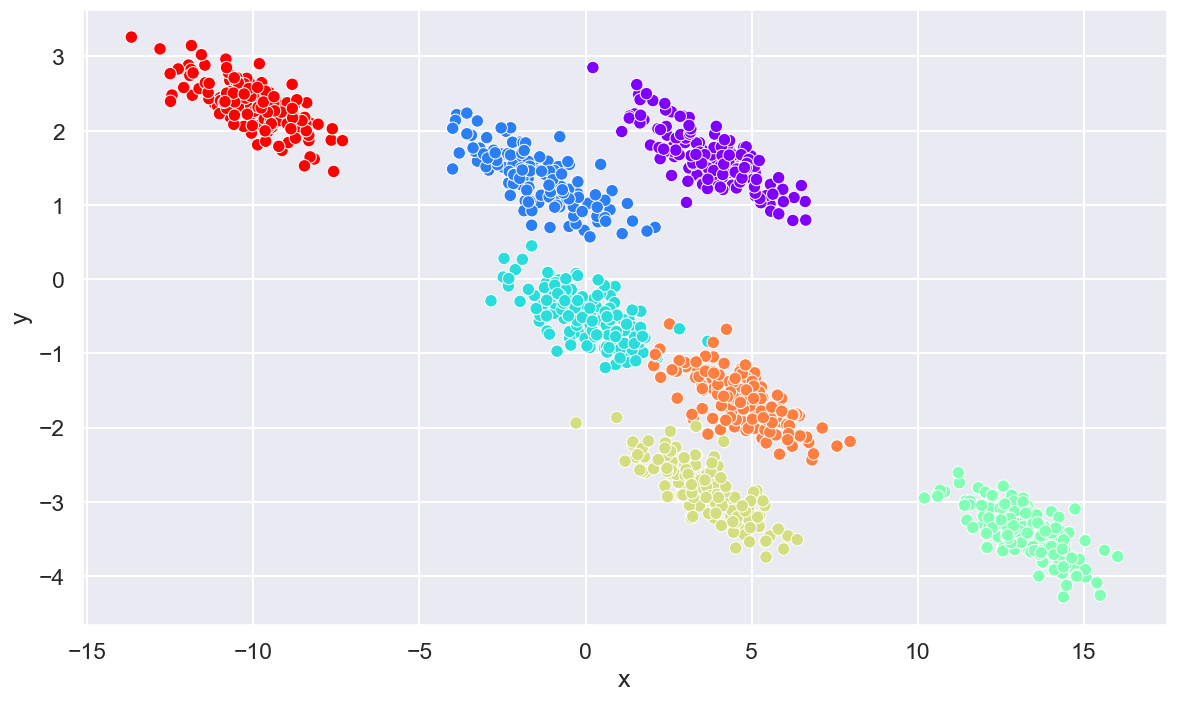

In [72]:
_ = sns.scatterplot(x='x', y='y', data=df_transformed, hue='label', palette='rainbow', legend=False)

For K = 7 the Average Silhouette Score is: 0.5739589447368182


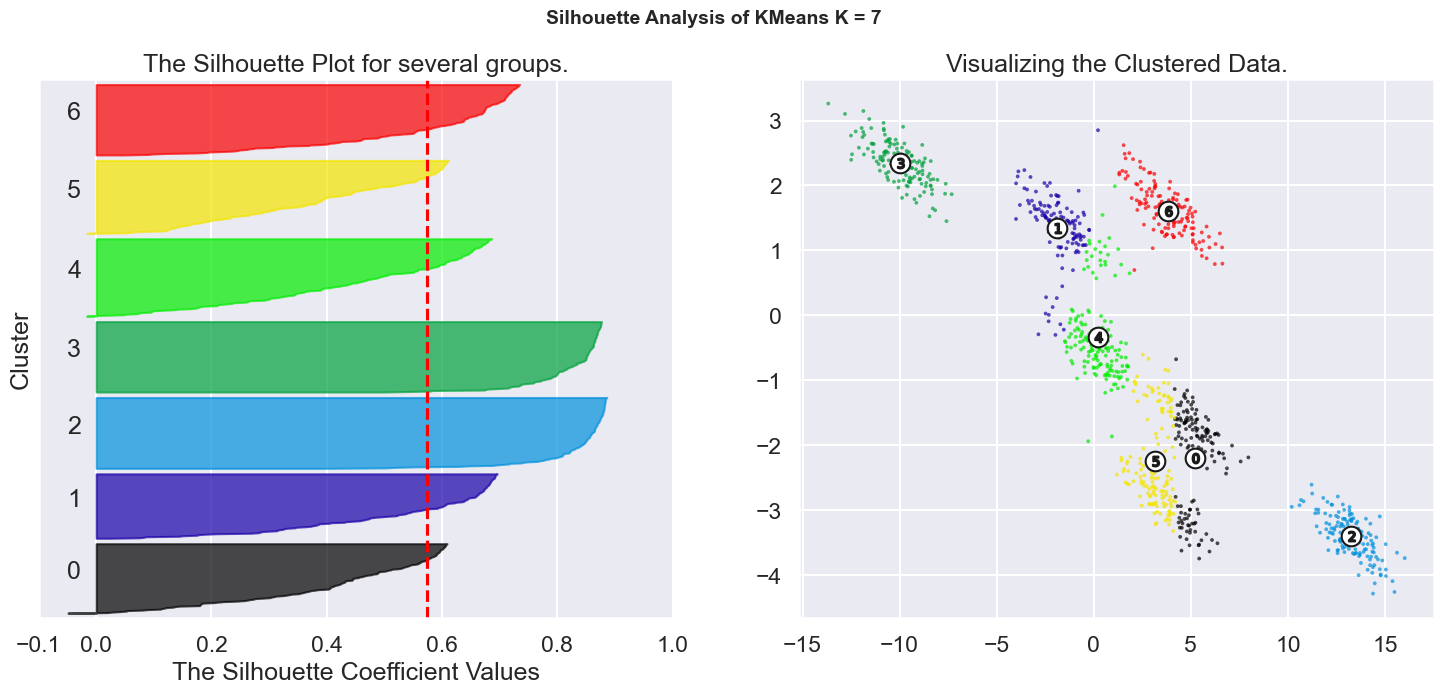

In [73]:
_, clusters_labels = train_and_plot_with_silhouette(df_transformed, k=7)

## Evaluating datasets with different group formats

In [74]:
X, y = make_moons(300, noise=.05, random_state=33)

df_moon = pd.DataFrame(X, columns=['x', 'y'])
df_moon['label'] = y

df_moon.head()

x         y  label
0  0.449533 -0.403077      1
1  1.860595  0.011092      1
2  1.842407 -0.086292      1
3  1.395956 -0.438878      1
4  0.479125  0.926415      0

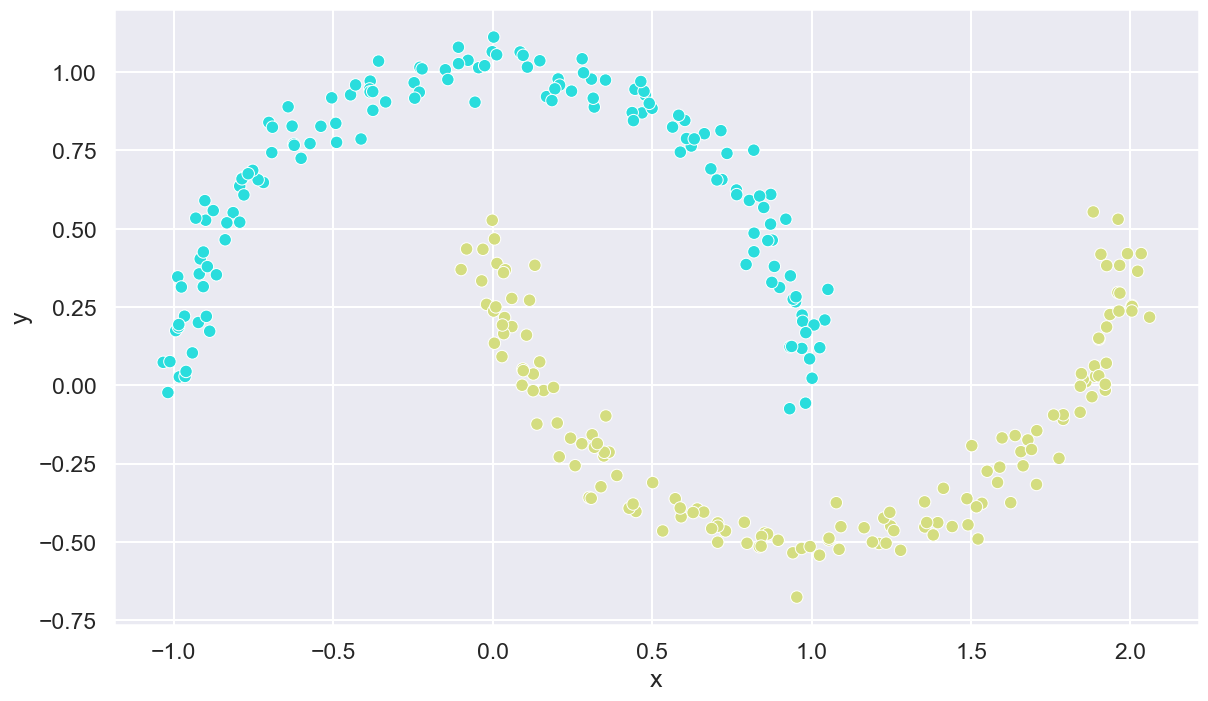

In [75]:
_ = sns.scatterplot(x='x', y='y', data=df_moon, hue='label', palette='rainbow', legend=False)

For K = 2 the Average Silhouette Score is: 0.4915067777320047


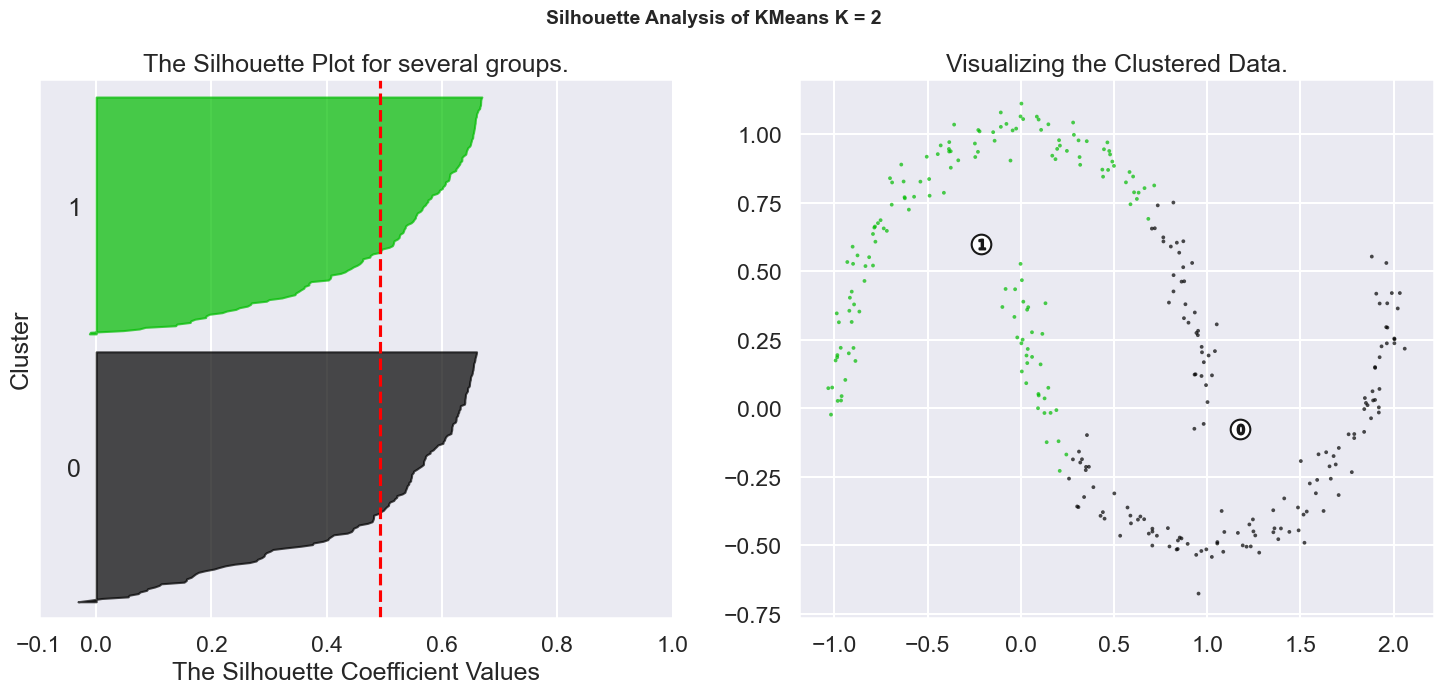

In [76]:
_, clusters_labels = train_and_plot_with_silhouette(df_moon, k=2)

## Noisy/random Dataset:

In [77]:
# We created a synthetic dataset with 1000 instances and two features
random_data = np.random.rand(500, 2)

df_random = pd.DataFrame(random_data, columns=['x', 'y'])
df_random['label'] = None
df_random.head()

x         y label
0  0.010005  0.817583  None
1  0.642424  0.362381  None
2  0.444198  0.549218  None
3  0.826362  0.119066  None
4  0.375205  0.761949  None

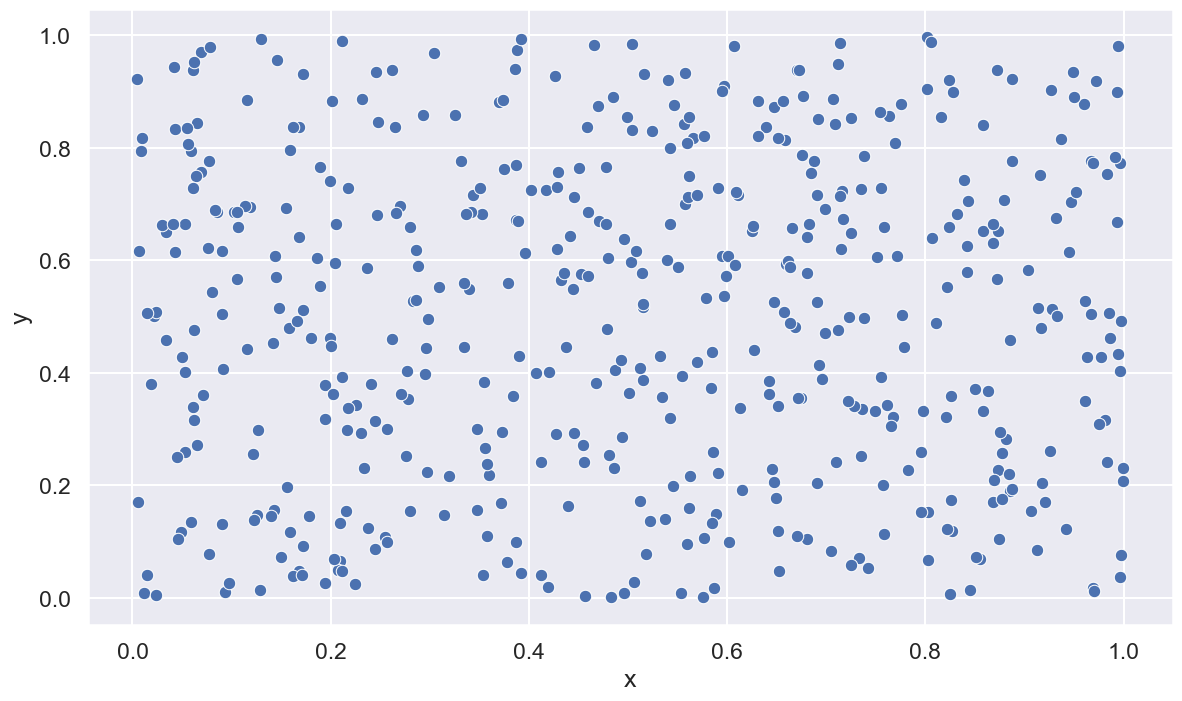

In [78]:
_ = sns.scatterplot(x='x', y='y', data=df_random, legend=False)

For K = 2 the Average Silhouette Score is: 0.35495650850672206


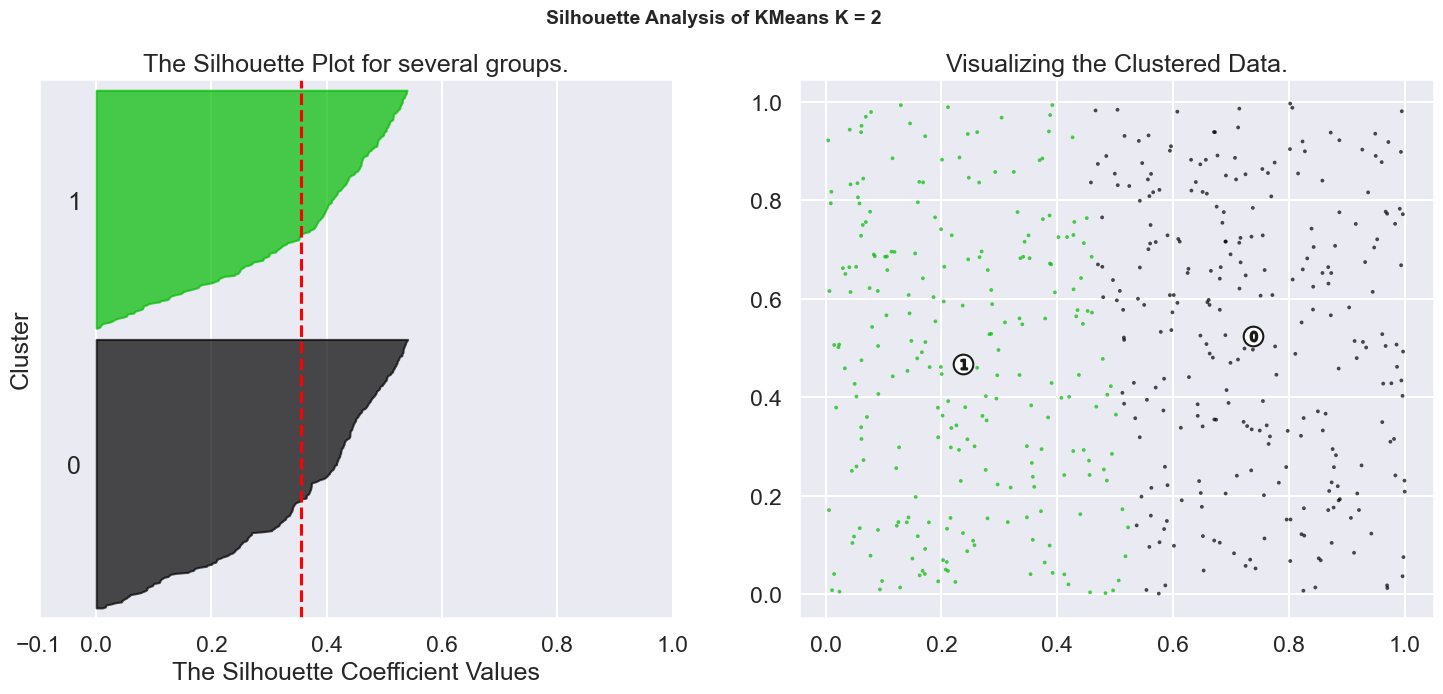

In [79]:
_, clusters_labels = train_and_plot_with_silhouette(df_random, k=2)